### The full data set used in this notebook is not included in the repository due to other reasons

In [1]:
# import warnings filter
from warnings import simplefilter
# ignore all future warnings
simplefilter(action='ignore', category=FutureWarning)

import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
from sklearn.preprocessing import MinMaxScaler
tf.__version__

'1.14.0'

In [2]:
from tensorflow.python.keras.models import Sequential
from tensorflow.python.keras.layers import Input, Dense, GRU, Embedding
from tensorflow.python.keras.optimizers import RMSprop
from tensorflow.python.keras.callbacks import EarlyStopping, ModelCheckpoint, TensorBoard, ReduceLROnPlateau

In [21]:
path = os.getcwd() # get current directory
files = os.listdir(path)
files_csv = [f for f in files if f[-3:] == 'csv'] # list all .csv files in the directory 
files_csv
name = [i[:-4] for i in files_csv]

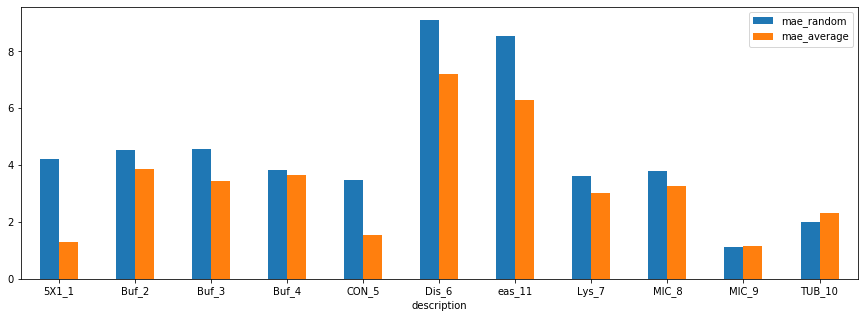

In [4]:
#random generation
benchmark_1=[]
for i in files_csv:
    df = pd.read_csv(i)
    test = df.iloc[42:,1].values
    train = df.iloc[:42]
    max_train = train['quantity'].max()
    
    # generate random numbers
    from random import randrange
    dummys_y = []
    for j in range(1000):
        dummy_y = []
        for i in range(7):
            dummy_y.append(randrange(max_train))
        dummys_y.append(dummy_y)

    # find mean 
    from sklearn.metrics import mean_absolute_error
    a = []
    for i in dummys_y:
        a.append(mean_absolute_error(test, i))
    
    #result
    benchmark_1.append(sum(a)/1000) 
    
#static average
benchmark_2=[]
for i in files_csv:
    df = pd.read_csv(i)
    test = df.iloc[42:,1].values
    train = df.iloc[:42]

    # find the mean
    mean_train = train['quantity'].mean() 
    b_1 = [mean_train]*7
    benchmark_2.append(mean_absolute_error(test, b_1))


df = pd.DataFrame({'description':name, 'mae_random':benchmark_1, 'mae_average':benchmark_2})
ax = df.plot.bar(x='description', y=['mae_random','mae_average'], rot=0, figsize=(15,5))

In [ ]:
df

In [ ]:
#linear regression
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error


linear_regression_mae=[]

for i in files_csv:
    df = pd.read_csv(i)
    test = df.iloc[42:,1].values
    train = df.iloc[:42]
    X_train = np.array([i for i in range(42)])
    X_train = X_train.reshape(-1, 1)
    y_train = train['quantity'].tolist()
    X_test = np.array([i for i in range(42, 49)]).reshape(-1, 1)
    
    #build linear model
    reg = LinearRegression().fit(X_train, y_train)    
    y_predict_linear = reg.predict(X_test)
    df['prediction'] = reg.predict(X_train).tolist() + y_predict_linear.tolist()
    linear_regression_mae.append(mean_absolute_error(test, y_predict_linear))
    
    #plot
    ax = df.plot(x='date', y=['quantity', 'prediction'])
    ax.set_title('linear model prediction for '+ i[:-4])
   
    




In [ ]:
df2

In [ ]:
df2 = pd.DataFrame({'description':name, 'linear_regression_mae':linear_regression_mae,'benchmark_mae':benchmark_2})
ax2 = df2.plot.bar(x='description', y=['linear_regression_mae', 'benchmark_mae'], rot=0, figsize=(15,5))

In [5]:
# import warnings filter
from warnings import simplefilter
# ignore all future warnings
simplefilter(action='ignore', category=FutureWarning)


%matplotlib inline
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
from sklearn.preprocessing import MinMaxScaler
tf.__version__

#LSTM
from tensorflow.python.keras.models import Sequential
from tensorflow.python.keras.layers import Input, Dense, GRU, Embedding
from tensorflow.python.keras.optimizers import RMSprop
from tensorflow.python.keras.callbacks import EarlyStopping, ModelCheckpoint, TensorBoard, ReduceLROnPlateau

In [26]:
# set parameters
rolling_window = 5
my_epochs = 1000
my_batch_size = 32
my_units = 50
my_dropout = 0.2

In [27]:
# Importing the Keras libraries and packages
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout

5X1_1.csv 

Epoch 1/1000
37/37 [==============================] - 2s 52ms/step - loss: 1.1356 - acc: 0.8108 - mean_absolute_error: 1.1356
Epoch 2/1000
37/37 [==============================] - 0s 593us/step - loss: 1.1380 - acc: 0.8108 - mean_absolute_error: 1.1380
Epoch 3/1000
37/37 [==============================] - 0s 538us/step - loss: 1.1370 - acc: 0.8108 - mean_absolute_error: 1.1370
Epoch 4/1000
37/37 [==============================] - 0s 592us/step - loss: 1.1390 - acc: 0.8108 - mean_absolute_error: 1.1390
Epoch 5/1000
37/37 [==============================] - 0s 593us/step - loss: 1.1398 - acc: 0.8108 - mean_absolute_error: 1.1398
Epoch 6/1000
37/37 [==============================] - 0s 539us/step - loss: 1.1383 - acc: 0.8108 - mean_absolute_error: 1.1383
Epoch 7/1000
37/37 [==============================] - 0s 539us/step - loss: 1.1388 - acc: 0.8108 - mean_absolute_error: 1.1388
Epoch 8/1000
37/37 [==============================] - 0s 539us/step - loss: 1.1356 - acc: 0.8108 - m

Epoch 65/1000
37/37 [==============================] - 0s 647us/step - loss: 1.1354 - acc: 0.8108 - mean_absolute_error: 1.1354
Epoch 66/1000
37/37 [==============================] - 0s 620us/step - loss: 1.1358 - acc: 0.8108 - mean_absolute_error: 1.1358
Epoch 67/1000
37/37 [==============================] - 0s 647us/step - loss: 1.1342 - acc: 0.8108 - mean_absolute_error: 1.1342
Epoch 68/1000
37/37 [==============================] - 0s 674us/step - loss: 1.1377 - acc: 0.8108 - mean_absolute_error: 1.1377
Epoch 69/1000
37/37 [==============================] - 0s 593us/step - loss: 1.1351 - acc: 0.8108 - mean_absolute_error: 1.1351
Epoch 70/1000
37/37 [==============================] - 0s 674us/step - loss: 1.1335 - acc: 0.8108 - mean_absolute_error: 1.1335
Epoch 71/1000
37/37 [==============================] - 0s 566us/step - loss: 1.1384 - acc: 0.8108 - mean_absolute_error: 1.1384
Epoch 72/1000
37/37 [==============================] - 0s 566us/step - loss: 1.1362 - acc: 0.8108 - mean

37/37 [==============================] - 0s 755us/step - loss: 0.7817 - acc: 0.7568 - mean_absolute_error: 0.7817
Epoch 192/1000
37/37 [==============================] - 0s 701us/step - loss: 0.7346 - acc: 0.7568 - mean_absolute_error: 0.7346
Epoch 193/1000
37/37 [==============================] - 0s 593us/step - loss: 0.6975 - acc: 0.7838 - mean_absolute_error: 0.6975
Epoch 194/1000
37/37 [==============================] - 0s 836us/step - loss: 0.7017 - acc: 0.7838 - mean_absolute_error: 0.7017
Epoch 195/1000
37/37 [==============================] - 0s 701us/step - loss: 0.7276 - acc: 0.8108 - mean_absolute_error: 0.7276
Epoch 196/1000
37/37 [==============================] - 0s 782us/step - loss: 0.7006 - acc: 0.7838 - mean_absolute_error: 0.7006
Epoch 197/1000
37/37 [==============================] - 0s 728us/step - loss: 0.6745 - acc: 0.7838 - mean_absolute_error: 0.6745
Epoch 198/1000
37/37 [==============================] - 0s 701us/step - loss: 0.5814 - acc: 0.8378 - mean_absolu

37/37 [==============================] - 0s 620us/step - loss: 0.6319 - acc: 0.8378 - mean_absolute_error: 0.6319
Epoch 318/1000
37/37 [==============================] - 0s 566us/step - loss: 0.6415 - acc: 0.8378 - mean_absolute_error: 0.6415
Epoch 319/1000
37/37 [==============================] - 0s 620us/step - loss: 0.6582 - acc: 0.8108 - mean_absolute_error: 0.6582
Epoch 320/1000
37/37 [==============================] - 0s 674us/step - loss: 0.5995 - acc: 0.8649 - mean_absolute_error: 0.5995
Epoch 321/1000
37/37 [==============================] - 0s 566us/step - loss: 0.6448 - acc: 0.8108 - mean_absolute_error: 0.6448
Epoch 322/1000
37/37 [==============================] - 0s 620us/step - loss: 0.6026 - acc: 0.8378 - mean_absolute_error: 0.6026
Epoch 323/1000
37/37 [==============================] - 0s 593us/step - loss: 0.6500 - acc: 0.8378 - mean_absolute_error: 0.6500
Epoch 324/1000
37/37 [==============================] - 0s 620us/step - loss: 0.6911 - acc: 0.7838 - mean_absolu

37/37 [==============================] - 0s 620us/step - loss: 0.6587 - acc: 0.8108 - mean_absolute_error: 0.6587
Epoch 381/1000
37/37 [==============================] - 0s 539us/step - loss: 0.6400 - acc: 0.8108 - mean_absolute_error: 0.6400
Epoch 382/1000
37/37 [==============================] - 0s 701us/step - loss: 0.6220 - acc: 0.8108 - mean_absolute_error: 0.6220
Epoch 383/1000
37/37 [==============================] - 0s 620us/step - loss: 0.6622 - acc: 0.7838 - mean_absolute_error: 0.6622
Epoch 384/1000
37/37 [==============================] - 0s 566us/step - loss: 0.6191 - acc: 0.8108 - mean_absolute_error: 0.6191
Epoch 385/1000
37/37 [==============================] - 0s 566us/step - loss: 0.5693 - acc: 0.8378 - mean_absolute_error: 0.5693
Epoch 386/1000
37/37 [==============================] - 0s 647us/step - loss: 0.6345 - acc: 0.8108 - mean_absolute_error: 0.6345
Epoch 387/1000
37/37 [==============================] - 0s 647us/step - loss: 0.5995 - acc: 0.8108 - mean_absolu

37/37 [==============================] - 0s 593us/step - loss: 0.5375 - acc: 0.8649 - mean_absolute_error: 0.5375
Epoch 507/1000
37/37 [==============================] - 0s 620us/step - loss: 0.5681 - acc: 0.8378 - mean_absolute_error: 0.5681
Epoch 508/1000
37/37 [==============================] - 0s 566us/step - loss: 0.5547 - acc: 0.8378 - mean_absolute_error: 0.5547
Epoch 509/1000
37/37 [==============================] - 0s 620us/step - loss: 0.5589 - acc: 0.8378 - mean_absolute_error: 0.5589
Epoch 510/1000
37/37 [==============================] - 0s 566us/step - loss: 0.5011 - acc: 0.8378 - mean_absolute_error: 0.5011
Epoch 511/1000
37/37 [==============================] - 0s 566us/step - loss: 0.4888 - acc: 0.8649 - mean_absolute_error: 0.4888
Epoch 512/1000
37/37 [==============================] - 0s 593us/step - loss: 0.5925 - acc: 0.8378 - mean_absolute_error: 0.5925
Epoch 513/1000
37/37 [==============================] - 0s 566us/step - loss: 0.5145 - acc: 0.8649 - mean_absolu

37/37 [==============================] - 0s 862us/step - loss: 0.5737 - acc: 0.8378 - mean_absolute_error: 0.5737
Epoch 570/1000
37/37 [==============================] - 0s 890us/step - loss: 0.4947 - acc: 0.8378 - mean_absolute_error: 0.4947
Epoch 571/1000
37/37 [==============================] - 0s 863us/step - loss: 0.4849 - acc: 0.8378 - mean_absolute_error: 0.4849
Epoch 572/1000
37/37 [==============================] - 0s 863us/step - loss: 0.5254 - acc: 0.8108 - mean_absolute_error: 0.5254
Epoch 573/1000
37/37 [==============================] - 0s 863us/step - loss: 0.4955 - acc: 0.8649 - mean_absolute_error: 0.4955
Epoch 574/1000
37/37 [==============================] - 0s 836us/step - loss: 0.5365 - acc: 0.8378 - mean_absolute_error: 0.5365
Epoch 575/1000
37/37 [==============================] - 0s 836us/step - loss: 0.5396 - acc: 0.8108 - mean_absolute_error: 0.5396
Epoch 576/1000
37/37 [==============================] - 0s 863us/step - loss: 0.4914 - acc: 0.8108 - mean_absolu

37/37 [==============================] - 0s 809us/step - loss: 0.3723 - acc: 0.8108 - mean_absolute_error: 0.3723
Epoch 696/1000
37/37 [==============================] - 0s 782us/step - loss: 0.3527 - acc: 0.8649 - mean_absolute_error: 0.3527
Epoch 697/1000
37/37 [==============================] - 0s 755us/step - loss: 0.3934 - acc: 0.8108 - mean_absolute_error: 0.3934
Epoch 698/1000
37/37 [==============================] - 0s 863us/step - loss: 0.3235 - acc: 0.8378 - mean_absolute_error: 0.3235
Epoch 699/1000
37/37 [==============================] - 0s 863us/step - loss: 0.3163 - acc: 0.8649 - mean_absolute_error: 0.3163
Epoch 700/1000
37/37 [==============================] - 0s 863us/step - loss: 0.2883 - acc: 0.8649 - mean_absolute_error: 0.2883
Epoch 701/1000
37/37 [==============================] - 0s 863us/step - loss: 0.2950 - acc: 0.8919 - mean_absolute_error: 0.2950
Epoch 702/1000
37/37 [==============================] - 0s 944us/step - loss: 0.3666 - acc: 0.8378 - mean_absolu

37/37 [==============================] - 0s 674us/step - loss: 0.2638 - acc: 0.8919 - mean_absolute_error: 0.2638
Epoch 822/1000
37/37 [==============================] - 0s 728us/step - loss: 0.2514 - acc: 0.8919 - mean_absolute_error: 0.2514
Epoch 823/1000
37/37 [==============================] - 0s 701us/step - loss: 0.2274 - acc: 0.9189 - mean_absolute_error: 0.2274
Epoch 824/1000
37/37 [==============================] - 0s 863us/step - loss: 0.3227 - acc: 0.8649 - mean_absolute_error: 0.3227
Epoch 825/1000
37/37 [==============================] - 0s 755us/step - loss: 0.2696 - acc: 0.8919 - mean_absolute_error: 0.2696
Epoch 826/1000
37/37 [==============================] - 0s 701us/step - loss: 0.2840 - acc: 0.8919 - mean_absolute_error: 0.2840
Epoch 827/1000
37/37 [==============================] - 0s 674us/step - loss: 0.3327 - acc: 0.8378 - mean_absolute_error: 0.3327
Epoch 828/1000
37/37 [==============================] - 0s 755us/step - loss: 0.2537 - acc: 0.8919 - mean_absolu

37/37 [==============================] - 0s 728us/step - loss: 0.2727 - acc: 0.8919 - mean_absolute_error: 0.2727
Epoch 948/1000
37/37 [==============================] - 0s 701us/step - loss: 0.2289 - acc: 0.9459 - mean_absolute_error: 0.2289
Epoch 949/1000
37/37 [==============================] - 0s 701us/step - loss: 0.2623 - acc: 0.8919 - mean_absolute_error: 0.2623
Epoch 950/1000
37/37 [==============================] - 0s 728us/step - loss: 0.2788 - acc: 0.8919 - mean_absolute_error: 0.2788
Epoch 951/1000
37/37 [==============================] - 0s 701us/step - loss: 0.2709 - acc: 0.8919 - mean_absolute_error: 0.2709
Epoch 952/1000
37/37 [==============================] - 0s 728us/step - loss: 0.2368 - acc: 0.9189 - mean_absolute_error: 0.2368
Epoch 953/1000
37/37 [==============================] - 0s 701us/step - loss: 0.2597 - acc: 0.8649 - mean_absolute_error: 0.2597
Epoch 954/1000
37/37 [==============================] - 0s 701us/step - loss: 0.3029 - acc: 0.8649 - mean_absolu

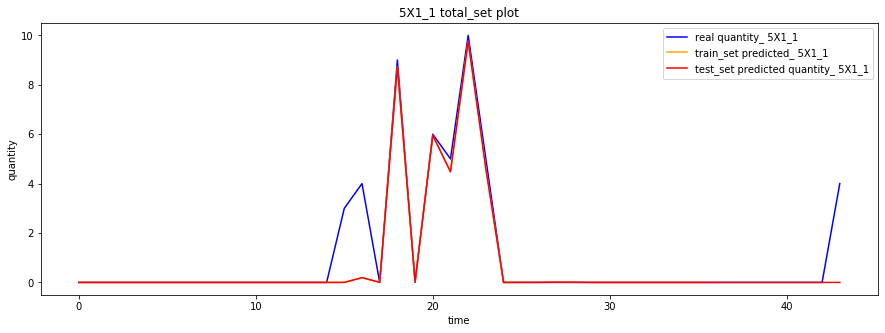

Buf_2.csv 

Epoch 1/1000
37/37 [==============================] - 2s 61ms/step - loss: 1.8700 - acc: 0.7027 - mean_absolute_error: 1.8700
Epoch 2/1000
37/37 [==============================] - 0s 502us/step - loss: 1.8745 - acc: 0.7027 - mean_absolute_error: 1.8745
Epoch 3/1000
37/37 [==============================] - 0s 538us/step - loss: 1.8723 - acc: 0.7027 - mean_absolute_error: 1.8723
Epoch 4/1000
37/37 [==============================] - 0s 512us/step - loss: 1.8832 - acc: 0.7027 - mean_absolute_error: 1.8832
Epoch 5/1000
37/37 [==============================] - 0s 538us/step - loss: 1.8700 - acc: 0.7027 - mean_absolute_error: 1.8700
Epoch 6/1000
37/37 [==============================] - 0s 539us/step - loss: 1.8780 - acc: 0.7027 - mean_absolute_error: 1.8780
Epoch 7/1000
37/37 [==============================] - 0s 458us/step - loss: 1.8799 - acc: 0.7027 - mean_absolute_error: 1.8799
Epoch 8/1000
37/37 [==============================] - 0s 458us/step - loss: 1.8795 - acc: 0.7027 - m

Epoch 65/1000
37/37 [==============================] - 0s 701us/step - loss: 1.8664 - acc: 0.7027 - mean_absolute_error: 1.8664
Epoch 66/1000
37/37 [==============================] - 0s 701us/step - loss: 1.8665 - acc: 0.7027 - mean_absolute_error: 1.8665
Epoch 67/1000
37/37 [==============================] - 0s 728us/step - loss: 1.8660 - acc: 0.7027 - mean_absolute_error: 1.8660
Epoch 68/1000
37/37 [==============================] - 0s 728us/step - loss: 1.8663 - acc: 0.7027 - mean_absolute_error: 1.8663
Epoch 69/1000
37/37 [==============================] - 0s 701us/step - loss: 1.8666 - acc: 0.7027 - mean_absolute_error: 1.8666
Epoch 70/1000
37/37 [==============================] - 0s 674us/step - loss: 1.8665 - acc: 0.7027 - mean_absolute_error: 1.8665
Epoch 71/1000
37/37 [==============================] - 0s 755us/step - loss: 1.8664 - acc: 0.7027 - mean_absolute_error: 1.8664
Epoch 72/1000
37/37 [==============================] - 0s 782us/step - loss: 1.8659 - acc: 0.7027 - mean

37/37 [==============================] - 0s 755us/step - loss: 1.8660 - acc: 0.7027 - mean_absolute_error: 1.8660
Epoch 192/1000
37/37 [==============================] - 0s 755us/step - loss: 1.8654 - acc: 0.7027 - mean_absolute_error: 1.8654
Epoch 193/1000
37/37 [==============================] - 0s 728us/step - loss: 1.8664 - acc: 0.7027 - mean_absolute_error: 1.8664
Epoch 194/1000
37/37 [==============================] - 0s 755us/step - loss: 1.8661 - acc: 0.7027 - mean_absolute_error: 1.8661
Epoch 195/1000
37/37 [==============================] - 0s 890us/step - loss: 1.8659 - acc: 0.7027 - mean_absolute_error: 1.8659
Epoch 196/1000
37/37 [==============================] - 0s 809us/step - loss: 1.8660 - acc: 0.7027 - mean_absolute_error: 1.8660
Epoch 197/1000
37/37 [==============================] - 0s 728us/step - loss: 1.8665 - acc: 0.7027 - mean_absolute_error: 1.8665
Epoch 198/1000
37/37 [==============================] - 0s 782us/step - loss: 1.8664 - acc: 0.7027 - mean_absolu

37/37 [==============================] - 0s 728us/step - loss: 1.8654 - acc: 0.7027 - mean_absolute_error: 1.8654
Epoch 318/1000
37/37 [==============================] - 0s 728us/step - loss: 1.8665 - acc: 0.7027 - mean_absolute_error: 1.8665
Epoch 319/1000
37/37 [==============================] - 0s 701us/step - loss: 1.8656 - acc: 0.7027 - mean_absolute_error: 1.8656
Epoch 320/1000
37/37 [==============================] - 0s 809us/step - loss: 1.8659 - acc: 0.7027 - mean_absolute_error: 1.8659
Epoch 321/1000
37/37 [==============================] - 0s 755us/step - loss: 1.8654 - acc: 0.7027 - mean_absolute_error: 1.8654
Epoch 322/1000
37/37 [==============================] - 0s 755us/step - loss: 1.8662 - acc: 0.7027 - mean_absolute_error: 1.8662
Epoch 323/1000
37/37 [==============================] - 0s 809us/step - loss: 1.8668 - acc: 0.7027 - mean_absolute_error: 1.8668
Epoch 324/1000
37/37 [==============================] - 0s 755us/step - loss: 1.8662 - acc: 0.7027 - mean_absolu

37/37 [==============================] - 0s 728us/step - loss: 1.6007 - acc: 0.6486 - mean_absolute_error: 1.6007
Epoch 444/1000
37/37 [==============================] - 0s 755us/step - loss: 1.5785 - acc: 0.6486 - mean_absolute_error: 1.5785
Epoch 445/1000
37/37 [==============================] - 0s 701us/step - loss: 1.6164 - acc: 0.6486 - mean_absolute_error: 1.6164
Epoch 446/1000
37/37 [==============================] - 0s 782us/step - loss: 1.5285 - acc: 0.7027 - mean_absolute_error: 1.5285
Epoch 447/1000
37/37 [==============================] - 0s 755us/step - loss: 1.5148 - acc: 0.7297 - mean_absolute_error: 1.5148
Epoch 448/1000
37/37 [==============================] - ETA: 0s - loss: 1.5699 - acc: 0.7188 - mean_absolute_error: 1.569 - 0s 728us/step - loss: 1.5362 - acc: 0.7297 - mean_absolute_error: 1.5362
Epoch 449/1000
37/37 [==============================] - 0s 728us/step - loss: 1.5507 - acc: 0.7297 - mean_absolute_error: 1.5507
Epoch 450/1000
37/37 [======================

37/37 [==============================] - 0s 809us/step - loss: 1.5062 - acc: 0.7297 - mean_absolute_error: 1.5062
Epoch 507/1000
37/37 [==============================] - 0s 782us/step - loss: 1.5087 - acc: 0.7027 - mean_absolute_error: 1.5087
Epoch 508/1000
37/37 [==============================] - 0s 728us/step - loss: 1.4747 - acc: 0.7027 - mean_absolute_error: 1.4747
Epoch 509/1000
37/37 [==============================] - 0s 836us/step - loss: 1.4819 - acc: 0.6757 - mean_absolute_error: 1.4819
Epoch 510/1000
37/37 [==============================] - 0s 769us/step - loss: 1.4915 - acc: 0.7297 - mean_absolute_error: 1.4915
Epoch 511/1000
37/37 [==============================] - 0s 809us/step - loss: 1.4654 - acc: 0.7297 - mean_absolute_error: 1.4654
Epoch 512/1000
37/37 [==============================] - 0s 755us/step - loss: 1.4410 - acc: 0.7568 - mean_absolute_error: 1.4410
Epoch 513/1000
37/37 [==============================] - 0s 755us/step - loss: 1.4536 - acc: 0.7568 - mean_absolu

37/37 [==============================] - 0s 701us/step - loss: 1.3854 - acc: 0.7027 - mean_absolute_error: 1.3854
Epoch 633/1000
37/37 [==============================] - 0s 701us/step - loss: 1.3659 - acc: 0.7568 - mean_absolute_error: 1.3659
Epoch 634/1000
37/37 [==============================] - 0s 674us/step - loss: 1.3297 - acc: 0.6486 - mean_absolute_error: 1.3297
Epoch 635/1000
37/37 [==============================] - 0s 647us/step - loss: 1.3768 - acc: 0.6757 - mean_absolute_error: 1.3768
Epoch 636/1000
37/37 [==============================] - 0s 674us/step - loss: 1.3190 - acc: 0.7568 - mean_absolute_error: 1.3190
Epoch 637/1000
37/37 [==============================] - 0s 647us/step - loss: 1.3856 - acc: 0.7297 - mean_absolute_error: 1.3856
Epoch 638/1000
37/37 [==============================] - 0s 569us/step - loss: 1.3183 - acc: 0.7027 - mean_absolute_error: 1.3183
Epoch 639/1000
37/37 [==============================] - 0s 422us/step - loss: 1.3729 - acc: 0.7027 - mean_absolu

37/37 [==============================] - 0s 422us/step - loss: 1.3606 - acc: 0.7297 - mean_absolute_error: 1.3606
Epoch 759/1000
37/37 [==============================] - 0s 844us/step - loss: 1.3677 - acc: 0.7297 - mean_absolute_error: 1.3677
Epoch 760/1000
37/37 [==============================] - 0s 779us/step - loss: 1.3678 - acc: 0.7297 - mean_absolute_error: 1.3678
Epoch 761/1000
37/37 [==============================] - 0s 647us/step - loss: 1.3885 - acc: 0.7027 - mean_absolute_error: 1.3885
Epoch 762/1000
37/37 [==============================] - 0s 422us/step - loss: 1.3699 - acc: 0.7568 - mean_absolute_error: 1.3699
Epoch 763/1000
37/37 [==============================] - 0s 844us/step - loss: 1.3632 - acc: 0.6757 - mean_absolute_error: 1.3632
Epoch 764/1000
37/37 [==============================] - 0s 422us/step - loss: 1.3536 - acc: 0.7568 - mean_absolute_error: 1.3536
Epoch 765/1000
37/37 [==============================] - 0s 844us/step - loss: 1.3796 - acc: 0.7568 - mean_absolu

37/37 [==============================] - 0s 636us/step - loss: 1.2944 - acc: 0.7568 - mean_absolute_error: 1.2944
Epoch 885/1000
37/37 [==============================] - 0s 674us/step - loss: 1.3425 - acc: 0.7027 - mean_absolute_error: 1.3425
Epoch 886/1000
37/37 [==============================] - 0s 571us/step - loss: 1.3466 - acc: 0.7568 - mean_absolute_error: 1.3466
Epoch 887/1000
37/37 [==============================] - 0s 422us/step - loss: 1.3418 - acc: 0.7297 - mean_absolute_error: 1.3418
Epoch 888/1000
37/37 [==============================] - 0s 844us/step - loss: 1.3456 - acc: 0.7297 - mean_absolute_error: 1.3456
Epoch 889/1000
37/37 [==============================] - 0s 422us/step - loss: 1.3317 - acc: 0.7568 - mean_absolute_error: 1.3317
Epoch 890/1000
37/37 [==============================] - 0s 844us/step - loss: 1.3682 - acc: 0.6757 - mean_absolute_error: 1.3682
Epoch 891/1000
37/37 [==============================] - 0s 422us/step - loss: 1.3748 - acc: 0.7297 - mean_absolu

37/37 [==============================] - 0s 674us/step - loss: 1.3686 - acc: 0.7568 - mean_absolute_error: 1.3686
Epoch 948/1000
37/37 [==============================] - 0s 568us/step - loss: 1.3412 - acc: 0.7027 - mean_absolute_error: 1.3412
Epoch 949/1000
37/37 [==============================] - 0s 422us/step - loss: 1.4059 - acc: 0.7297 - mean_absolute_error: 1.4059
Epoch 950/1000
37/37 [==============================] - 0s 844us/step - loss: 1.3698 - acc: 0.7297 - mean_absolute_error: 1.3698
Epoch 951/1000
37/37 [==============================] - 0s 844us/step - loss: 1.3290 - acc: 0.7568 - mean_absolute_error: 1.3290
Epoch 952/1000
37/37 [==============================] - 0s 422us/step - loss: 1.3832 - acc: 0.7027 - mean_absolute_error: 1.3832
Epoch 953/1000
37/37 [==============================] - 0s 844us/step - loss: 1.3834 - acc: 0.7297 - mean_absolute_error: 1.3834
Epoch 954/1000
37/37 [==============================] - 0s 422us/step - loss: 1.3704 - acc: 0.7297 - mean_absolu

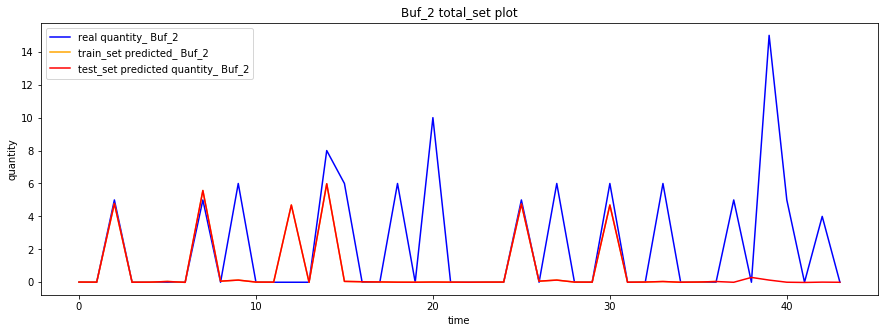

Buf_3.csv 

Epoch 1/1000
37/37 [==============================] - 2s 63ms/step - loss: 2.0395 - acc: 0.6757 - mean_absolute_error: 2.0395
Epoch 2/1000
37/37 [==============================] - 0s 517us/step - loss: 2.0354 - acc: 0.6757 - mean_absolute_error: 2.0354
Epoch 3/1000
37/37 [==============================] - 0s 422us/step - loss: 2.0336 - acc: 0.6757 - mean_absolute_error: 2.0336
Epoch 4/1000
37/37 [==============================] - 0s 422us/step - loss: 2.0406 - acc: 0.6757 - mean_absolute_error: 2.0406
Epoch 5/1000
37/37 [==============================] - 0s 844us/step - loss: 2.0392 - acc: 0.6757 - mean_absolute_error: 2.0392
Epoch 6/1000
37/37 [==============================] - 0s 422us/step - loss: 2.0309 - acc: 0.6757 - mean_absolute_error: 2.0309
Epoch 7/1000
37/37 [==============================] - 0s 422us/step - loss: 2.0331 - acc: 0.6757 - mean_absolute_error: 2.0331
Epoch 8/1000
37/37 [==============================] - 0s 422us/step - loss: 2.0290 - acc: 0.6757 - m

Epoch 65/1000
37/37 [==============================] - 0s 844us/step - loss: 2.0269 - acc: 0.6757 - mean_absolute_error: 2.0269
Epoch 66/1000
37/37 [==============================] - 0s 422us/step - loss: 2.0260 - acc: 0.6757 - mean_absolute_error: 2.0260
Epoch 67/1000
37/37 [==============================] - 0s 844us/step - loss: 2.0280 - acc: 0.6757 - mean_absolute_error: 2.0280
Epoch 68/1000
37/37 [==============================] - 0s 422us/step - loss: 2.0298 - acc: 0.6757 - mean_absolute_error: 2.0298
Epoch 69/1000
37/37 [==============================] - 0s 945us/step - loss: 2.0281 - acc: 0.6757 - mean_absolute_error: 2.0281
Epoch 70/1000
37/37 [==============================] - 0s 487us/step - loss: 2.0271 - acc: 0.6757 - mean_absolute_error: 2.0271
Epoch 71/1000
37/37 [==============================] - 0s 844us/step - loss: 2.0303 - acc: 0.6757 - mean_absolute_error: 2.0303
Epoch 72/1000
37/37 [==============================] - 0s 422us/step - loss: 2.0302 - acc: 0.6757 - mean

37/37 [==============================] - 0s 844us/step - loss: 1.6389 - acc: 0.6486 - mean_absolute_error: 1.6389
Epoch 192/1000
37/37 [==============================] - 0s 422us/step - loss: 1.6411 - acc: 0.6757 - mean_absolute_error: 1.6411
Epoch 193/1000
37/37 [==============================] - 0s 422us/step - loss: 1.6913 - acc: 0.6757 - mean_absolute_error: 1.6913
Epoch 194/1000
37/37 [==============================] - 0s 862us/step - loss: 1.6732 - acc: 0.7027 - mean_absolute_error: 1.6732
Epoch 195/1000
37/37 [==============================] - 0s 647us/step - loss: 1.6327 - acc: 0.6757 - mean_absolute_error: 1.6327
Epoch 196/1000
37/37 [==============================] - 0s 352us/step - loss: 1.6307 - acc: 0.6757 - mean_absolute_error: 1.6307
Epoch 197/1000
37/37 [==============================] - 0s 844us/step - loss: 1.6353 - acc: 0.5946 - mean_absolute_error: 1.6353
Epoch 198/1000
37/37 [==============================] - 0s 422us/step - loss: 1.6397 - acc: 0.6216 - mean_absolu

37/37 [==============================] - 0s 701us/step - loss: 1.2103 - acc: 0.6757 - mean_absolute_error: 1.2103
Epoch 318/1000
37/37 [==============================] - 0s 647us/step - loss: 1.1395 - acc: 0.7297 - mean_absolute_error: 1.1395
Epoch 319/1000
37/37 [==============================] - 0s 647us/step - loss: 1.1907 - acc: 0.7297 - mean_absolute_error: 1.1907
Epoch 320/1000
37/37 [==============================] - 0s 674us/step - loss: 1.1544 - acc: 0.7027 - mean_absolute_error: 1.1544
Epoch 321/1000
37/37 [==============================] - 0s 674us/step - loss: 1.2351 - acc: 0.7027 - mean_absolute_error: 1.2351
Epoch 322/1000
37/37 [==============================] - 0s 674us/step - loss: 1.2132 - acc: 0.7027 - mean_absolute_error: 1.2132
Epoch 323/1000
37/37 [==============================] - 0s 701us/step - loss: 1.1607 - acc: 0.7297 - mean_absolute_error: 1.1607
Epoch 324/1000
37/37 [==============================] - 0s 701us/step - loss: 1.2669 - acc: 0.7027 - mean_absolu

37/37 [==============================] - 0s 844us/step - loss: 1.0270 - acc: 0.7568 - mean_absolute_error: 1.0270
Epoch 381/1000
37/37 [==============================] - 0s 422us/step - loss: 1.1616 - acc: 0.7027 - mean_absolute_error: 1.1616
Epoch 382/1000
37/37 [==============================] - 0s 422us/step - loss: 1.1862 - acc: 0.7027 - mean_absolute_error: 1.1862
Epoch 383/1000
37/37 [==============================] - 0s 844us/step - loss: 1.0079 - acc: 0.7297 - mean_absolute_error: 1.0079
Epoch 384/1000
37/37 [==============================] - 0s 422us/step - loss: 1.0727 - acc: 0.7297 - mean_absolute_error: 1.0727
Epoch 385/1000
37/37 [==============================] - 0s 844us/step - loss: 0.9958 - acc: 0.7297 - mean_absolute_error: 0.9958
Epoch 386/1000
37/37 [==============================] - 0s 422us/step - loss: 1.1140 - acc: 0.7027 - mean_absolute_error: 1.1140
Epoch 387/1000
37/37 [==============================] - 0s 844us/step - loss: 1.0001 - acc: 0.7027 - mean_absolu

37/37 [==============================] - 0s 422us/step - loss: 1.0527 - acc: 0.7027 - mean_absolute_error: 1.0527
Epoch 507/1000
37/37 [==============================] - 0s 844us/step - loss: 1.0503 - acc: 0.7297 - mean_absolute_error: 1.0503
Epoch 508/1000
37/37 [==============================] - 0s 422us/step - loss: 1.1188 - acc: 0.7027 - mean_absolute_error: 1.1188
Epoch 509/1000
37/37 [==============================] - 0s 422us/step - loss: 0.9989 - acc: 0.7568 - mean_absolute_error: 0.9989
Epoch 510/1000
37/37 [==============================] - 0s 910us/step - loss: 0.9862 - acc: 0.7297 - mean_absolute_error: 0.9862
Epoch 511/1000
37/37 [==============================] - 0s 674us/step - loss: 1.0462 - acc: 0.7027 - mean_absolute_error: 1.0462
Epoch 512/1000
37/37 [==============================] - 0s 486us/step - loss: 1.1013 - acc: 0.7027 - mean_absolute_error: 1.1013
Epoch 513/1000
37/37 [==============================] - 0s 844us/step - loss: 1.0665 - acc: 0.7297 - mean_absolu

37/37 [==============================] - 0s 422us/step - loss: 1.0434 - acc: 0.6757 - mean_absolute_error: 1.0434
Epoch 633/1000
37/37 [==============================] - 0s 422us/step - loss: 1.0435 - acc: 0.7027 - mean_absolute_error: 1.0435
Epoch 634/1000
37/37 [==============================] - 0s 844us/step - loss: 1.0844 - acc: 0.7297 - mean_absolute_error: 1.0844
Epoch 635/1000
37/37 [==============================] - 0s 422us/step - loss: 1.0696 - acc: 0.7297 - mean_absolute_error: 1.0696
Epoch 636/1000
37/37 [==============================] - 0s 844us/step - loss: 1.0039 - acc: 0.7297 - mean_absolute_error: 1.0039
Epoch 637/1000
37/37 [==============================] - 0s 844us/step - loss: 1.0175 - acc: 0.7297 - mean_absolute_error: 1.0175
Epoch 638/1000
37/37 [==============================] - 0s 422us/step - loss: 1.0047 - acc: 0.7297 - mean_absolute_error: 1.0047
Epoch 639/1000
37/37 [==============================] - 0s 844us/step - loss: 0.9598 - acc: 0.7568 - mean_absolu

37/37 [==============================] - 0s 844us/step - loss: 1.0198 - acc: 0.6757 - mean_absolute_error: 1.0198
Epoch 758/1000
37/37 [==============================] - 0s 422us/step - loss: 0.9946 - acc: 0.7568 - mean_absolute_error: 0.9946
Epoch 759/1000
37/37 [==============================] - 0s 844us/step - loss: 1.0668 - acc: 0.7297 - mean_absolute_error: 1.0668
Epoch 760/1000
37/37 [==============================] - ETA: 0s - loss: 1.1298 - acc: 0.6562 - mean_absolute_error: 1.129 - 0s 406us/step - loss: 1.0682 - acc: 0.6757 - mean_absolute_error: 1.0682
Epoch 761/1000
37/37 [==============================] - 0s 422us/step - loss: 1.0383 - acc: 0.7297 - mean_absolute_error: 1.0383
Epoch 762/1000
37/37 [==============================] - 0s 844us/step - loss: 1.0683 - acc: 0.7027 - mean_absolute_error: 1.0683
Epoch 763/1000
37/37 [==============================] - 0s 422us/step - loss: 0.9686 - acc: 0.7838 - mean_absolute_error: 0.9686
Epoch 764/1000
37/37 [======================

37/37 [==============================] - 0s 782us/step - loss: 0.9900 - acc: 0.7297 - mean_absolute_error: 0.9900
Epoch 884/1000
37/37 [==============================] - 0s 755us/step - loss: 1.0122 - acc: 0.7027 - mean_absolute_error: 1.0122
Epoch 885/1000
37/37 [==============================] - 0s 755us/step - loss: 1.0107 - acc: 0.6757 - mean_absolute_error: 1.0107
Epoch 886/1000
37/37 [==============================] - 0s 728us/step - loss: 0.9117 - acc: 0.7297 - mean_absolute_error: 0.9117
Epoch 887/1000
37/37 [==============================] - 0s 674us/step - loss: 0.9133 - acc: 0.7568 - mean_absolute_error: 0.9133
Epoch 888/1000
37/37 [==============================] - 0s 366us/step - loss: 0.9660 - acc: 0.7568 - mean_absolute_error: 0.9660
Epoch 889/1000
37/37 [==============================] - 0s 845us/step - loss: 0.9811 - acc: 0.7568 - mean_absolute_error: 0.9811
Epoch 890/1000
37/37 [==============================] - 0s 844us/step - loss: 0.9721 - acc: 0.7297 - mean_absolu

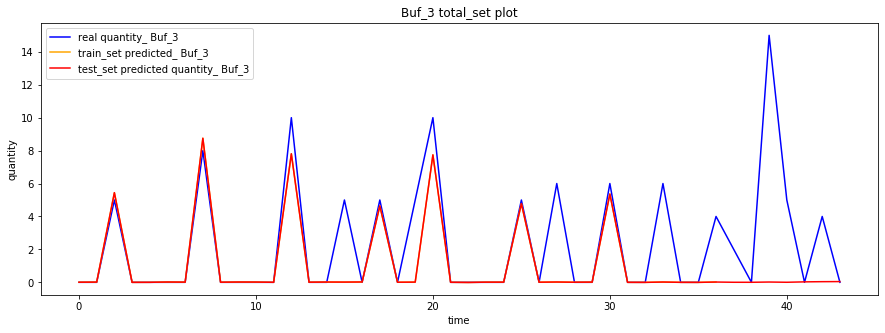

Buf_4.csv 

Epoch 1/1000
37/37 [==============================] - 3s 75ms/step - loss: 1.6000 - acc: 0.7027 - mean_absolute_error: 1.6000
Epoch 2/1000
37/37 [==============================] - 0s 674us/step - loss: 1.6040 - acc: 0.7027 - mean_absolute_error: 1.6040
Epoch 3/1000
37/37 [==============================] - 0s 698us/step - loss: 1.6010 - acc: 0.7027 - mean_absolute_error: 1.6010
Epoch 4/1000
37/37 [==============================] - 0s 659us/step - loss: 1.5981 - acc: 0.7027 - mean_absolute_error: 1.5981
Epoch 5/1000
37/37 [==============================] - 0s 593us/step - loss: 1.6060 - acc: 0.7027 - mean_absolute_error: 1.6060
Epoch 6/1000
37/37 [==============================] - 0s 620us/step - loss: 1.5995 - acc: 0.7027 - mean_absolute_error: 1.5995
Epoch 7/1000
37/37 [==============================] - 0s 566us/step - loss: 1.5994 - acc: 0.7027 - mean_absolute_error: 1.5994
Epoch 8/1000
37/37 [==============================] - 0s 593us/step - loss: 1.6012 - acc: 0.7027 - m

Epoch 65/1000
37/37 [==============================] - 0s 755us/step - loss: 1.5955 - acc: 0.7027 - mean_absolute_error: 1.5955
Epoch 66/1000
37/37 [==============================] - 0s 782us/step - loss: 1.5961 - acc: 0.7027 - mean_absolute_error: 1.5961
Epoch 67/1000
37/37 [==============================] - 0s 755us/step - loss: 1.5962 - acc: 0.7027 - mean_absolute_error: 1.5962
Epoch 68/1000
37/37 [==============================] - 0s 782us/step - loss: 1.5957 - acc: 0.7027 - mean_absolute_error: 1.5957
Epoch 69/1000
37/37 [==============================] - 0s 782us/step - loss: 1.5953 - acc: 0.7027 - mean_absolute_error: 1.5953
Epoch 70/1000
37/37 [==============================] - 0s 836us/step - loss: 1.5964 - acc: 0.7027 - mean_absolute_error: 1.5964
Epoch 71/1000
37/37 [==============================] - 0s 755us/step - loss: 1.5962 - acc: 0.7027 - mean_absolute_error: 1.5962
Epoch 72/1000
37/37 [==============================] - 0s 755us/step - loss: 1.5971 - acc: 0.7027 - mean

37/37 [==============================] - 0s 782us/step - loss: 1.5956 - acc: 0.7027 - mean_absolute_error: 1.5956
Epoch 192/1000
37/37 [==============================] - 0s 728us/step - loss: 1.5970 - acc: 0.7027 - mean_absolute_error: 1.5970
Epoch 193/1000
37/37 [==============================] - 0s 809us/step - loss: 1.5964 - acc: 0.7027 - mean_absolute_error: 1.5964
Epoch 194/1000
37/37 [==============================] - 0s 755us/step - loss: 1.5957 - acc: 0.7027 - mean_absolute_error: 1.5957
Epoch 195/1000
37/37 [==============================] - 0s 836us/step - loss: 1.5960 - acc: 0.7027 - mean_absolute_error: 1.5960
Epoch 196/1000
37/37 [==============================] - 0s 916us/step - loss: 1.5964 - acc: 0.7027 - mean_absolute_error: 1.5964
Epoch 197/1000
37/37 [==============================] - 0s 890us/step - loss: 1.5964 - acc: 0.7027 - mean_absolute_error: 1.5964
Epoch 198/1000
37/37 [==============================] - 0s 889us/step - loss: 1.5957 - acc: 0.7027 - mean_absolu

37/37 [==============================] - 0s 701us/step - loss: 1.5957 - acc: 0.7027 - mean_absolute_error: 1.5957
Epoch 318/1000
37/37 [==============================] - 0s 728us/step - loss: 1.5953 - acc: 0.7027 - mean_absolute_error: 1.5953
Epoch 319/1000
37/37 [==============================] - 0s 728us/step - loss: 1.5952 - acc: 0.7027 - mean_absolute_error: 1.5952
Epoch 320/1000
37/37 [==============================] - 0s 889us/step - loss: 1.5950 - acc: 0.7027 - mean_absolute_error: 1.5950
Epoch 321/1000
37/37 [==============================] - 0s 755us/step - loss: 1.5950 - acc: 0.7027 - mean_absolute_error: 1.5950
Epoch 322/1000
37/37 [==============================] - 0s 755us/step - loss: 1.5953 - acc: 0.7027 - mean_absolute_error: 1.5953
Epoch 323/1000
37/37 [==============================] - 0s 809us/step - loss: 1.5953 - acc: 0.7027 - mean_absolute_error: 1.5953
Epoch 324/1000
37/37 [==============================] - 0s 782us/step - loss: 1.5956 - acc: 0.7027 - mean_absolu

37/37 [==============================] - 0s 728us/step - loss: 1.5954 - acc: 0.7027 - mean_absolute_error: 1.5954
Epoch 444/1000
37/37 [==============================] - 0s 755us/step - loss: 1.5950 - acc: 0.7027 - mean_absolute_error: 1.5950
Epoch 445/1000
37/37 [==============================] - 0s 755us/step - loss: 1.5956 - acc: 0.7027 - mean_absolute_error: 1.5956
Epoch 446/1000
37/37 [==============================] - 0s 836us/step - loss: 1.5959 - acc: 0.7027 - mean_absolute_error: 1.5959
Epoch 447/1000
37/37 [==============================] - 0s 782us/step - loss: 1.5953 - acc: 0.7027 - mean_absolute_error: 1.5953
Epoch 448/1000
37/37 [==============================] - 0s 728us/step - loss: 1.5954 - acc: 0.7027 - mean_absolute_error: 1.5954
Epoch 449/1000
37/37 [==============================] - 0s 809us/step - loss: 1.5953 - acc: 0.7027 - mean_absolute_error: 1.5953
Epoch 450/1000
37/37 [==============================] - 0s 809us/step - loss: 1.5954 - acc: 0.7027 - mean_absolu

37/37 [==============================] - 0s 728us/step - loss: 1.5955 - acc: 0.7027 - mean_absolute_error: 1.5955
Epoch 570/1000
37/37 [==============================] - 0s 728us/step - loss: 1.5953 - acc: 0.7027 - mean_absolute_error: 1.5953
Epoch 571/1000
37/37 [==============================] - 0s 755us/step - loss: 1.5955 - acc: 0.7027 - mean_absolute_error: 1.5955
Epoch 572/1000
37/37 [==============================] - 0s 836us/step - loss: 1.5956 - acc: 0.7027 - mean_absolute_error: 1.5956
Epoch 573/1000
37/37 [==============================] - 0s 755us/step - loss: 1.5953 - acc: 0.7027 - mean_absolute_error: 1.5953
Epoch 574/1000
37/37 [==============================] - 0s 701us/step - loss: 1.5949 - acc: 0.7027 - mean_absolute_error: 1.5949
Epoch 575/1000
37/37 [==============================] - 0s 728us/step - loss: 1.5951 - acc: 0.7027 - mean_absolute_error: 1.5951
Epoch 576/1000
37/37 [==============================] - 0s 755us/step - loss: 1.5950 - acc: 0.7027 - mean_absolu

37/37 [==============================] - 0s 728us/step - loss: 1.5954 - acc: 0.7027 - mean_absolute_error: 1.5954
Epoch 696/1000
37/37 [==============================] - 0s 701us/step - loss: 1.5950 - acc: 0.7027 - mean_absolute_error: 1.5950
Epoch 697/1000
37/37 [==============================] - 0s 728us/step - loss: 1.5953 - acc: 0.7027 - mean_absolute_error: 1.5953
Epoch 698/1000
37/37 [==============================] - 0s 701us/step - loss: 1.5951 - acc: 0.7027 - mean_absolute_error: 1.5951
Epoch 699/1000
37/37 [==============================] - 0s 352us/step - loss: 1.5950 - acc: 0.7027 - mean_absolute_error: 1.5950
Epoch 700/1000
37/37 [==============================] - 0s 844us/step - loss: 1.5953 - acc: 0.7027 - mean_absolute_error: 1.5953
Epoch 701/1000
37/37 [==============================] - 0s 914us/step - loss: 1.5949 - acc: 0.7027 - mean_absolute_error: 1.5949
Epoch 702/1000
37/37 [==============================] - 0s 674us/step - loss: 1.5950 - acc: 0.7027 - mean_absolu

37/37 [==============================] - 0s 755us/step - loss: 1.5949 - acc: 0.7027 - mean_absolute_error: 1.5949
Epoch 822/1000
37/37 [==============================] - 0s 755us/step - loss: 1.5951 - acc: 0.7027 - mean_absolute_error: 1.5951
Epoch 823/1000
37/37 [==============================] - 0s 728us/step - loss: 1.5951 - acc: 0.7027 - mean_absolute_error: 1.5951
Epoch 824/1000
37/37 [==============================] - 0s 701us/step - loss: 1.5953 - acc: 0.7027 - mean_absolute_error: 1.5953
Epoch 825/1000
37/37 [==============================] - 0s 755us/step - loss: 1.5952 - acc: 0.7027 - mean_absolute_error: 1.5952
Epoch 826/1000
37/37 [==============================] - 0s 755us/step - loss: 1.5951 - acc: 0.7027 - mean_absolute_error: 1.5951
Epoch 827/1000
37/37 [==============================] - 0s 701us/step - loss: 1.5947 - acc: 0.7027 - mean_absolute_error: 1.5947
Epoch 828/1000
37/37 [==============================] - 0s 782us/step - loss: 1.5950 - acc: 0.7027 - mean_absolu

37/37 [==============================] - 0s 755us/step - loss: 1.5948 - acc: 0.7027 - mean_absolute_error: 1.5948
Epoch 948/1000
37/37 [==============================] - 0s 755us/step - loss: 1.5949 - acc: 0.7027 - mean_absolute_error: 1.5949
Epoch 949/1000
37/37 [==============================] - 0s 728us/step - loss: 1.5951 - acc: 0.7027 - mean_absolute_error: 1.5951
Epoch 950/1000
37/37 [==============================] - 0s 863us/step - loss: 1.5948 - acc: 0.7027 - mean_absolute_error: 1.5948
Epoch 951/1000
37/37 [==============================] - 0s 728us/step - loss: 1.5953 - acc: 0.7027 - mean_absolute_error: 1.5953
Epoch 952/1000
37/37 [==============================] - 0s 755us/step - loss: 1.5956 - acc: 0.7027 - mean_absolute_error: 1.5956
Epoch 953/1000
37/37 [==============================] - 0s 782us/step - loss: 1.5949 - acc: 0.7027 - mean_absolute_error: 1.5949
Epoch 954/1000
37/37 [==============================] - 0s 755us/step - loss: 1.5951 - acc: 0.7027 - mean_absolu

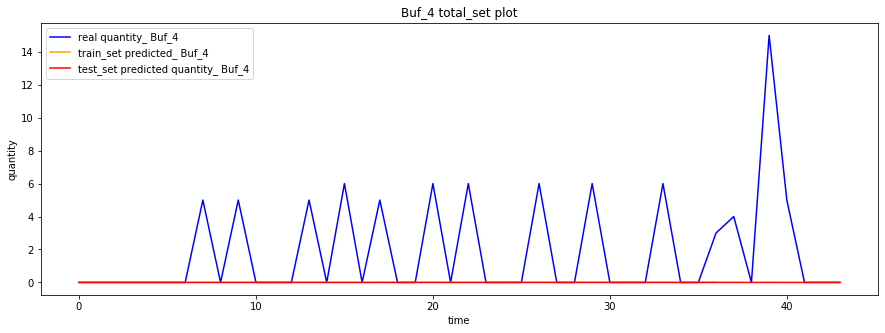

CON_5.csv 

Epoch 1/1000
37/37 [==============================] - 3s 76ms/step - loss: 2.0059 - acc: 0.6757 - mean_absolute_error: 2.0059
Epoch 2/1000
37/37 [==============================] - 0s 647us/step - loss: 2.0077 - acc: 0.6757 - mean_absolute_error: 2.0077
Epoch 3/1000
37/37 [==============================] - 0s 593us/step - loss: 2.0074 - acc: 0.6757 - mean_absolute_error: 2.0074
Epoch 4/1000
37/37 [==============================] - 0s 598us/step - loss: 2.0078 - acc: 0.6757 - mean_absolute_error: 2.0078
Epoch 5/1000
37/37 [==============================] - 0s 592us/step - loss: 2.0052 - acc: 0.6757 - mean_absolute_error: 2.0052
Epoch 6/1000
37/37 [==============================] - 0s 593us/step - loss: 2.0075 - acc: 0.6757 - mean_absolute_error: 2.0075
Epoch 7/1000
37/37 [==============================] - 0s 539us/step - loss: 2.0056 - acc: 0.6757 - mean_absolute_error: 2.0056
Epoch 8/1000
37/37 [==============================] - 0s 593us/step - loss: 2.0089 - acc: 0.6757 - m

Epoch 65/1000
37/37 [==============================] - 0s 755us/step - loss: 2.0011 - acc: 0.6757 - mean_absolute_error: 2.0011
Epoch 66/1000
37/37 [==============================] - 0s 728us/step - loss: 2.0018 - acc: 0.6757 - mean_absolute_error: 2.0018
Epoch 67/1000
37/37 [==============================] - 0s 836us/step - loss: 2.0030 - acc: 0.6757 - mean_absolute_error: 2.0030
Epoch 68/1000
37/37 [==============================] - 0s 782us/step - loss: 2.0010 - acc: 0.6757 - mean_absolute_error: 2.0010
Epoch 69/1000
37/37 [==============================] - 0s 782us/step - loss: 2.0016 - acc: 0.6757 - mean_absolute_error: 2.0016
Epoch 70/1000
37/37 [==============================] - 0s 782us/step - loss: 2.0014 - acc: 0.6757 - mean_absolute_error: 2.0014
Epoch 71/1000
37/37 [==============================] - 0s 809us/step - loss: 2.0013 - acc: 0.6757 - mean_absolute_error: 2.0013
Epoch 72/1000
37/37 [==============================] - 0s 755us/step - loss: 2.0006 - acc: 0.6757 - mean

37/37 [==============================] - 0s 844us/step - loss: 2.0006 - acc: 0.6757 - mean_absolute_error: 2.0006
Epoch 192/1000
37/37 [==============================] - 0s 844us/step - loss: 2.0020 - acc: 0.6757 - mean_absolute_error: 2.0020
Epoch 193/1000
37/37 [==============================] - 0s 844us/step - loss: 2.0010 - acc: 0.6757 - mean_absolute_error: 2.0010
Epoch 194/1000
37/37 [==============================] - 0s 1ms/step - loss: 2.0004 - acc: 0.6757 - mean_absolute_error: 2.0004
Epoch 195/1000
37/37 [==============================] - 0s 1ms/step - loss: 2.0016 - acc: 0.6757 - mean_absolute_error: 2.0016
Epoch 196/1000
37/37 [==============================] - 0s 943us/step - loss: 2.0010 - acc: 0.6757 - mean_absolute_error: 2.0010
Epoch 197/1000
37/37 [==============================] - 0s 1ms/step - loss: 2.0012 - acc: 0.6757 - mean_absolute_error: 2.0012
Epoch 198/1000
37/37 [==============================] - 0s 970us/step - loss: 2.0016 - acc: 0.6757 - mean_absolute_err

37/37 [==============================] - 0s 836us/step - loss: 2.0003 - acc: 0.6757 - mean_absolute_error: 2.0003
Epoch 318/1000
37/37 [==============================] - 0s 916us/step - loss: 1.9993 - acc: 0.6757 - mean_absolute_error: 1.9993
Epoch 319/1000
37/37 [==============================] - ETA: 0s - loss: 1.8121 - acc: 0.6875 - mean_absolute_error: 1.812 - 0s 916us/step - loss: 1.9994 - acc: 0.6757 - mean_absolute_error: 1.9994
Epoch 320/1000
37/37 [==============================] - 0s 970us/step - loss: 2.0004 - acc: 0.6757 - mean_absolute_error: 2.0004
Epoch 321/1000
37/37 [==============================] - 0s 916us/step - loss: 2.0008 - acc: 0.6757 - mean_absolute_error: 2.0008
Epoch 322/1000
37/37 [==============================] - 0s 916us/step - loss: 2.0004 - acc: 0.6757 - mean_absolute_error: 2.0004
Epoch 323/1000
37/37 [==============================] - 0s 890us/step - loss: 1.9999 - acc: 0.6757 - mean_absolute_error: 1.9999
Epoch 324/1000
37/37 [======================

37/37 [==============================] - 0s 863us/step - loss: 1.9722 - acc: 0.6757 - mean_absolute_error: 1.9722
Epoch 381/1000
37/37 [==============================] - 0s 916us/step - loss: 1.9754 - acc: 0.6486 - mean_absolute_error: 1.9754
Epoch 382/1000
37/37 [==============================] - 0s 889us/step - loss: 1.9597 - acc: 0.6486 - mean_absolute_error: 1.9597
Epoch 383/1000
37/37 [==============================] - 0s 943us/step - loss: 1.9697 - acc: 0.5946 - mean_absolute_error: 1.9697
Epoch 384/1000
37/37 [==============================] - 0s 970us/step - loss: 1.9682 - acc: 0.5946 - mean_absolute_error: 1.9682
Epoch 385/1000
37/37 [==============================] - 0s 916us/step - loss: 1.9457 - acc: 0.6216 - mean_absolute_error: 1.9457
Epoch 386/1000
37/37 [==============================] - 0s 943us/step - loss: 1.9009 - acc: 0.6216 - mean_absolute_error: 1.9009
Epoch 387/1000
37/37 [==============================] - 0s 890us/step - loss: 1.9149 - acc: 0.5946 - mean_absolu

37/37 [==============================] - 0s 916us/step - loss: 1.3272 - acc: 0.6757 - mean_absolute_error: 1.3272
Epoch 507/1000
37/37 [==============================] - 0s 863us/step - loss: 1.4981 - acc: 0.6216 - mean_absolute_error: 1.4981
Epoch 508/1000
37/37 [==============================] - 0s 890us/step - loss: 1.4428 - acc: 0.6216 - mean_absolute_error: 1.4428
Epoch 509/1000
37/37 [==============================] - 0s 943us/step - loss: 1.4054 - acc: 0.6486 - mean_absolute_error: 1.4054
Epoch 510/1000
37/37 [==============================] - 0s 970us/step - loss: 1.4238 - acc: 0.6216 - mean_absolute_error: 1.4238
Epoch 511/1000
37/37 [==============================] - 0s 917us/step - loss: 1.4253 - acc: 0.6757 - mean_absolute_error: 1.4253
Epoch 512/1000
37/37 [==============================] - 0s 890us/step - loss: 1.4526 - acc: 0.5946 - mean_absolute_error: 1.4526
Epoch 513/1000
37/37 [==============================] - 0s 916us/step - loss: 1.3452 - acc: 0.6486 - mean_absolu

37/37 [==============================] - 0s 916us/step - loss: 1.3260 - acc: 0.7027 - mean_absolute_error: 1.3260
Epoch 633/1000
37/37 [==============================] - 0s 863us/step - loss: 1.3629 - acc: 0.6486 - mean_absolute_error: 1.3629
Epoch 634/1000
37/37 [==============================] - 0s 890us/step - loss: 1.3401 - acc: 0.7027 - mean_absolute_error: 1.3401
Epoch 635/1000
37/37 [==============================] - 0s 916us/step - loss: 1.2973 - acc: 0.6486 - mean_absolute_error: 1.2973
Epoch 636/1000
37/37 [==============================] - 0s 890us/step - loss: 1.3352 - acc: 0.6757 - mean_absolute_error: 1.3352
Epoch 637/1000
37/37 [==============================] - 0s 890us/step - loss: 1.3451 - acc: 0.6757 - mean_absolute_error: 1.3451
Epoch 638/1000
37/37 [==============================] - 0s 916us/step - loss: 1.3098 - acc: 0.6216 - mean_absolute_error: 1.3098
Epoch 639/1000
37/37 [==============================] - 0s 890us/step - loss: 1.2717 - acc: 0.7027 - mean_absolu

37/37 [==============================] - 0s 863us/step - loss: 1.2863 - acc: 0.6757 - mean_absolute_error: 1.2863
Epoch 759/1000
37/37 [==============================] - 0s 890us/step - loss: 1.2689 - acc: 0.7297 - mean_absolute_error: 1.2689
Epoch 760/1000
37/37 [==============================] - 0s 890us/step - loss: 1.2452 - acc: 0.6757 - mean_absolute_error: 1.2452
Epoch 761/1000
37/37 [==============================] - 0s 970us/step - loss: 1.3022 - acc: 0.6486 - mean_absolute_error: 1.3022
Epoch 762/1000
37/37 [==============================] - 0s 1ms/step - loss: 1.2830 - acc: 0.6486 - mean_absolute_error: 1.2830
Epoch 763/1000
37/37 [==============================] - 0s 916us/step - loss: 1.3070 - acc: 0.6757 - mean_absolute_error: 1.3070
Epoch 764/1000
37/37 [==============================] - 0s 916us/step - loss: 1.2870 - acc: 0.7297 - mean_absolute_error: 1.2870
Epoch 765/1000
37/37 [==============================] - 0s 970us/step - loss: 1.2445 - acc: 0.6757 - mean_absolute

37/37 [==============================] - 0s 916us/step - loss: 1.2919 - acc: 0.7027 - mean_absolute_error: 1.2919
Epoch 885/1000
37/37 [==============================] - 0s 890us/step - loss: 1.2339 - acc: 0.7297 - mean_absolute_error: 1.2339
Epoch 886/1000
37/37 [==============================] - 0s 890us/step - loss: 1.2530 - acc: 0.7297 - mean_absolute_error: 1.2530
Epoch 887/1000
37/37 [==============================] - 0s 997us/step - loss: 1.2408 - acc: 0.7297 - mean_absolute_error: 1.2408
Epoch 888/1000
37/37 [==============================] - 0s 916us/step - loss: 1.2684 - acc: 0.7027 - mean_absolute_error: 1.2684
Epoch 889/1000
37/37 [==============================] - 0s 916us/step - loss: 1.2221 - acc: 0.7027 - mean_absolute_error: 1.2221
Epoch 890/1000
37/37 [==============================] - 0s 890us/step - loss: 1.2163 - acc: 0.7838 - mean_absolute_error: 1.2163
Epoch 891/1000
37/37 [==============================] - 0s 890us/step - loss: 1.2769 - acc: 0.7297 - mean_absolu

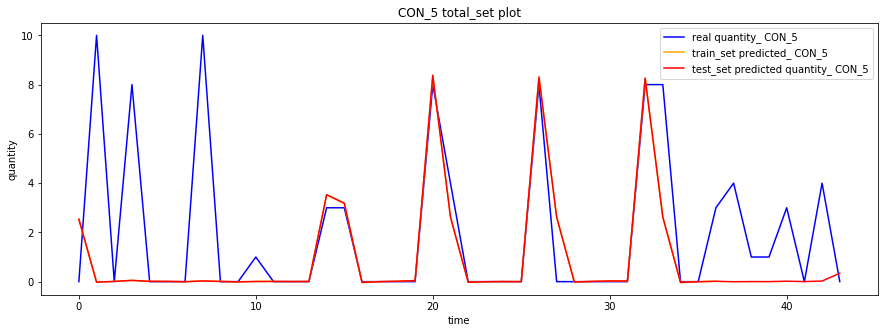

Dis_6.csv 

Epoch 1/1000
37/37 [==============================] - 3s 84ms/step - loss: 3.6294 - acc: 0.6216 - mean_absolute_error: 3.6294
Epoch 2/1000
37/37 [==============================] - 0s 670us/step - loss: 3.6245 - acc: 0.6216 - mean_absolute_error: 3.6245
Epoch 3/1000
37/37 [==============================] - 0s 729us/step - loss: 3.6482 - acc: 0.6216 - mean_absolute_error: 3.6482
Epoch 4/1000
37/37 [==============================] - 0s 674us/step - loss: 3.6394 - acc: 0.6216 - mean_absolute_error: 3.6394
Epoch 5/1000
37/37 [==============================] - 0s 674us/step - loss: 3.6446 - acc: 0.6216 - mean_absolute_error: 3.6446
Epoch 6/1000
37/37 [==============================] - 0s 647us/step - loss: 3.6403 - acc: 0.6216 - mean_absolute_error: 3.6403
Epoch 7/1000
37/37 [==============================] - 0s 674us/step - loss: 3.6335 - acc: 0.6216 - mean_absolute_error: 3.6335
Epoch 8/1000
37/37 [==============================] - 0s 701us/step - loss: 3.6347 - acc: 0.6216 - m

Epoch 65/1000
37/37 [==============================] - 0s 863us/step - loss: 3.6266 - acc: 0.6216 - mean_absolute_error: 3.6266
Epoch 66/1000
37/37 [==============================] - 0s 809us/step - loss: 3.6228 - acc: 0.6216 - mean_absolute_error: 3.6228
Epoch 67/1000
37/37 [==============================] - 0s 863us/step - loss: 3.6246 - acc: 0.6216 - mean_absolute_error: 3.6246
Epoch 68/1000
37/37 [==============================] - 0s 755us/step - loss: 3.6224 - acc: 0.6216 - mean_absolute_error: 3.6224
Epoch 69/1000
37/37 [==============================] - 0s 836us/step - loss: 3.6252 - acc: 0.6216 - mean_absolute_error: 3.6252
Epoch 70/1000
37/37 [==============================] - 0s 863us/step - loss: 3.6240 - acc: 0.6216 - mean_absolute_error: 3.6240
Epoch 71/1000
37/37 [==============================] - 0s 890us/step - loss: 3.6216 - acc: 0.6216 - mean_absolute_error: 3.6216
Epoch 72/1000
37/37 [==============================] - 0s 863us/step - loss: 3.6236 - acc: 0.6216 - mean

37/37 [==============================] - 0s 890us/step - loss: 2.7580 - acc: 0.6216 - mean_absolute_error: 2.7580
Epoch 192/1000
37/37 [==============================] - 0s 863us/step - loss: 2.8220 - acc: 0.5405 - mean_absolute_error: 2.8220
Epoch 193/1000
37/37 [==============================] - 0s 890us/step - loss: 2.7562 - acc: 0.5405 - mean_absolute_error: 2.7562
Epoch 194/1000
37/37 [==============================] - 0s 943us/step - loss: 2.6888 - acc: 0.5946 - mean_absolute_error: 2.6888
Epoch 195/1000
37/37 [==============================] - 0s 916us/step - loss: 2.7863 - acc: 0.4595 - mean_absolute_error: 2.7863
Epoch 196/1000
37/37 [==============================] - 0s 916us/step - loss: 2.6818 - acc: 0.5135 - mean_absolute_error: 2.6818
Epoch 197/1000
37/37 [==============================] - 0s 916us/step - loss: 2.6682 - acc: 0.5135 - mean_absolute_error: 2.6682
Epoch 198/1000
37/37 [==============================] - 0s 889us/step - loss: 2.4565 - acc: 0.5676 - mean_absolu

37/37 [==============================] - 0s 863us/step - loss: 1.7872 - acc: 0.5946 - mean_absolute_error: 1.7872
Epoch 318/1000
37/37 [==============================] - 0s 863us/step - loss: 2.0884 - acc: 0.5676 - mean_absolute_error: 2.0884
Epoch 319/1000
37/37 [==============================] - 0s 890us/step - loss: 1.7937 - acc: 0.5946 - mean_absolute_error: 1.7937
Epoch 320/1000
37/37 [==============================] - 0s 917us/step - loss: 1.8317 - acc: 0.5946 - mean_absolute_error: 1.8317
Epoch 321/1000
37/37 [==============================] - 0s 970us/step - loss: 1.9047 - acc: 0.5946 - mean_absolute_error: 1.9047
Epoch 322/1000
37/37 [==============================] - 0s 890us/step - loss: 1.9440 - acc: 0.5676 - mean_absolute_error: 1.9440
Epoch 323/1000
37/37 [==============================] - 0s 890us/step - loss: 2.0085 - acc: 0.5676 - mean_absolute_error: 2.0085
Epoch 324/1000
37/37 [==============================] - 0s 890us/step - loss: 1.9042 - acc: 0.5946 - mean_absolu

37/37 [==============================] - 0s 863us/step - loss: 1.7081 - acc: 0.6757 - mean_absolute_error: 1.7081
Epoch 444/1000
37/37 [==============================] - 0s 863us/step - loss: 1.6666 - acc: 0.6486 - mean_absolute_error: 1.6666
Epoch 445/1000
37/37 [==============================] - 0s 836us/step - loss: 1.6598 - acc: 0.6216 - mean_absolute_error: 1.6598
Epoch 446/1000
37/37 [==============================] - 0s 890us/step - loss: 1.7033 - acc: 0.6486 - mean_absolute_error: 1.7033
Epoch 447/1000
37/37 [==============================] - 0s 836us/step - loss: 1.7391 - acc: 0.5946 - mean_absolute_error: 1.7391
Epoch 448/1000
37/37 [==============================] - 0s 863us/step - loss: 1.6676 - acc: 0.6216 - mean_absolute_error: 1.6676
Epoch 449/1000
37/37 [==============================] - 0s 916us/step - loss: 1.6229 - acc: 0.6757 - mean_absolute_error: 1.6229
Epoch 450/1000
37/37 [==============================] - 0s 916us/step - loss: 1.5770 - acc: 0.6216 - mean_absolu

37/37 [==============================] - 0s 863us/step - loss: 1.5293 - acc: 0.6757 - mean_absolute_error: 1.5293
Epoch 570/1000
37/37 [==============================] - 0s 836us/step - loss: 1.6487 - acc: 0.6216 - mean_absolute_error: 1.6487
Epoch 571/1000
37/37 [==============================] - 0s 943us/step - loss: 1.6556 - acc: 0.6757 - mean_absolute_error: 1.6556
Epoch 572/1000
37/37 [==============================] - 0s 863us/step - loss: 1.8047 - acc: 0.6216 - mean_absolute_error: 1.8047
Epoch 573/1000
37/37 [==============================] - 0s 890us/step - loss: 1.6694 - acc: 0.6486 - mean_absolute_error: 1.6694
Epoch 574/1000
37/37 [==============================] - 0s 890us/step - loss: 1.7800 - acc: 0.6757 - mean_absolute_error: 1.7800
Epoch 575/1000
37/37 [==============================] - 0s 889us/step - loss: 1.6846 - acc: 0.6216 - mean_absolute_error: 1.6846
Epoch 576/1000
37/37 [==============================] - 0s 836us/step - loss: 1.6928 - acc: 0.6757 - mean_absolu

37/37 [==============================] - 0s 836us/step - loss: 1.5474 - acc: 0.6216 - mean_absolute_error: 1.5474
Epoch 696/1000
37/37 [==============================] - 0s 863us/step - loss: 1.5951 - acc: 0.5676 - mean_absolute_error: 1.5951
Epoch 697/1000
37/37 [==============================] - 0s 890us/step - loss: 1.5602 - acc: 0.5676 - mean_absolute_error: 1.5602
Epoch 698/1000
37/37 [==============================] - 0s 890us/step - loss: 1.4257 - acc: 0.6216 - mean_absolute_error: 1.4257
Epoch 699/1000
37/37 [==============================] - 0s 890us/step - loss: 1.5292 - acc: 0.6216 - mean_absolute_error: 1.5292
Epoch 700/1000
37/37 [==============================] - 0s 943us/step - loss: 1.4506 - acc: 0.7027 - mean_absolute_error: 1.4506
Epoch 701/1000
37/37 [==============================] - 0s 916us/step - loss: 1.4121 - acc: 0.7297 - mean_absolute_error: 1.4121
Epoch 702/1000
37/37 [==============================] - 0s 1ms/step - loss: 1.4744 - acc: 0.6486 - mean_absolute

37/37 [==============================] - 0s 836us/step - loss: 1.4779 - acc: 0.7027 - mean_absolute_error: 1.4779
Epoch 822/1000
37/37 [==============================] - 0s 809us/step - loss: 1.4249 - acc: 0.6216 - mean_absolute_error: 1.4249
Epoch 823/1000
37/37 [==============================] - 0s 809us/step - loss: 1.3955 - acc: 0.6757 - mean_absolute_error: 1.3955
Epoch 824/1000
37/37 [==============================] - 0s 889us/step - loss: 1.3228 - acc: 0.7027 - mean_absolute_error: 1.3228
Epoch 825/1000
37/37 [==============================] - 0s 889us/step - loss: 1.4469 - acc: 0.7027 - mean_absolute_error: 1.4469
Epoch 826/1000
37/37 [==============================] - 0s 916us/step - loss: 1.3645 - acc: 0.7297 - mean_absolute_error: 1.3645
Epoch 827/1000
37/37 [==============================] - 0s 863us/step - loss: 1.4730 - acc: 0.6757 - mean_absolute_error: 1.4730
Epoch 828/1000
37/37 [==============================] - 0s 836us/step - loss: 1.3872 - acc: 0.6216 - mean_absolu

37/37 [==============================] - 0s 863us/step - loss: 1.4820 - acc: 0.7297 - mean_absolute_error: 1.4820
Epoch 948/1000
37/37 [==============================] - 0s 890us/step - loss: 1.3338 - acc: 0.6486 - mean_absolute_error: 1.3338
Epoch 949/1000
37/37 [==============================] - 0s 836us/step - loss: 1.4975 - acc: 0.6486 - mean_absolute_error: 1.4975
Epoch 950/1000
37/37 [==============================] - 0s 890us/step - loss: 1.2474 - acc: 0.7027 - mean_absolute_error: 1.2474
Epoch 951/1000
37/37 [==============================] - 0s 890us/step - loss: 1.4051 - acc: 0.6757 - mean_absolute_error: 1.4051
Epoch 952/1000
37/37 [==============================] - 0s 836us/step - loss: 1.3795 - acc: 0.7027 - mean_absolute_error: 1.3795
Epoch 953/1000
37/37 [==============================] - 0s 836us/step - loss: 1.3806 - acc: 0.6486 - mean_absolute_error: 1.3806
Epoch 954/1000
37/37 [==============================] - 0s 863us/step - loss: 1.3874 - acc: 0.7027 - mean_absolu

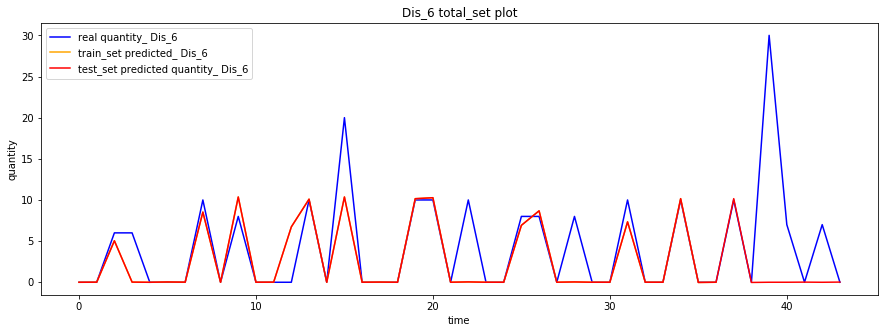

eas_11.csv 

Epoch 1/1000
37/37 [==============================] - 3s 94ms/step - loss: 3.3012 - acc: 0.5946 - mean_absolute_error: 3.3012
Epoch 2/1000
37/37 [==============================] - 0s 675us/step - loss: 3.3147 - acc: 0.5946 - mean_absolute_error: 3.3147
Epoch 3/1000
37/37 [==============================] - 0s 700us/step - loss: 3.3117 - acc: 0.5946 - mean_absolute_error: 3.3117
Epoch 4/1000
37/37 [==============================] - 0s 700us/step - loss: 3.3113 - acc: 0.5946 - mean_absolute_error: 3.3113
Epoch 5/1000
37/37 [==============================] - 0s 700us/step - loss: 3.3092 - acc: 0.5946 - mean_absolute_error: 3.3092
Epoch 6/1000
37/37 [==============================] - 0s 674us/step - loss: 3.3032 - acc: 0.5946 - mean_absolute_error: 3.3032
Epoch 7/1000
37/37 [==============================] - 0s 701us/step - loss: 3.3025 - acc: 0.5946 - mean_absolute_error: 3.3025
Epoch 8/1000
37/37 [==============================] - 0s 728us/step - loss: 3.3050 - acc: 0.5946 - 

Epoch 65/1000
37/37 [==============================] - 0s 836us/step - loss: 3.2958 - acc: 0.5946 - mean_absolute_error: 3.2958
Epoch 66/1000
37/37 [==============================] - 0s 943us/step - loss: 3.2990 - acc: 0.5946 - mean_absolute_error: 3.2990
Epoch 67/1000
37/37 [==============================] - 0s 863us/step - loss: 3.2966 - acc: 0.5946 - mean_absolute_error: 3.2966
Epoch 68/1000
37/37 [==============================] - 0s 916us/step - loss: 3.2977 - acc: 0.5946 - mean_absolute_error: 3.2977
Epoch 69/1000
37/37 [==============================] - 0s 863us/step - loss: 3.2970 - acc: 0.5946 - mean_absolute_error: 3.2970
Epoch 70/1000
37/37 [==============================] - 0s 836us/step - loss: 3.2988 - acc: 0.5946 - mean_absolute_error: 3.2988
Epoch 71/1000
37/37 [==============================] - 0s 862us/step - loss: 3.2962 - acc: 0.5946 - mean_absolute_error: 3.2962
Epoch 72/1000
37/37 [==============================] - 0s 836us/step - loss: 3.2983 - acc: 0.5946 - mean

37/37 [==============================] - 0s 890us/step - loss: 2.5703 - acc: 0.2973 - mean_absolute_error: 2.5703
Epoch 192/1000
37/37 [==============================] - 0s 836us/step - loss: 2.3705 - acc: 0.3784 - mean_absolute_error: 2.3705
Epoch 193/1000
37/37 [==============================] - 0s 863us/step - loss: 2.2932 - acc: 0.4054 - mean_absolute_error: 2.2932
Epoch 194/1000
37/37 [==============================] - 0s 890us/step - loss: 2.3306 - acc: 0.3243 - mean_absolute_error: 2.3306
Epoch 195/1000
37/37 [==============================] - 0s 916us/step - loss: 2.5054 - acc: 0.2973 - mean_absolute_error: 2.5054
Epoch 196/1000
37/37 [==============================] - 0s 916us/step - loss: 2.4049 - acc: 0.4054 - mean_absolute_error: 2.4049
Epoch 197/1000
37/37 [==============================] - 0s 890us/step - loss: 2.2433 - acc: 0.4054 - mean_absolute_error: 2.2433
Epoch 198/1000
37/37 [==============================] - 0s 917us/step - loss: 2.4465 - acc: 0.3514 - mean_absolu

37/37 [==============================] - 0s 863us/step - loss: 1.9921 - acc: 0.5405 - mean_absolute_error: 1.9921
Epoch 318/1000
37/37 [==============================] - 0s 863us/step - loss: 1.9786 - acc: 0.5676 - mean_absolute_error: 1.9786
Epoch 319/1000
37/37 [==============================] - 0s 863us/step - loss: 2.0099 - acc: 0.5405 - mean_absolute_error: 2.0099
Epoch 320/1000
37/37 [==============================] - 0s 917us/step - loss: 1.9796 - acc: 0.5405 - mean_absolute_error: 1.9796
Epoch 321/1000
37/37 [==============================] - 0s 890us/step - loss: 2.1019 - acc: 0.3784 - mean_absolute_error: 2.1019
Epoch 322/1000
37/37 [==============================] - 0s 863us/step - loss: 1.8635 - acc: 0.5405 - mean_absolute_error: 1.8635
Epoch 323/1000
37/37 [==============================] - 0s 863us/step - loss: 1.8794 - acc: 0.4054 - mean_absolute_error: 1.8794
Epoch 324/1000
37/37 [==============================] - 0s 863us/step - loss: 2.0522 - acc: 0.4865 - mean_absolu

37/37 [==============================] - 0s 916us/step - loss: 1.8013 - acc: 0.5946 - mean_absolute_error: 1.8013
Epoch 444/1000
37/37 [==============================] - 0s 916us/step - loss: 1.8318 - acc: 0.4865 - mean_absolute_error: 1.8318
Epoch 445/1000
37/37 [==============================] - 0s 863us/step - loss: 1.7015 - acc: 0.5676 - mean_absolute_error: 1.7015
Epoch 446/1000
37/37 [==============================] - 0s 889us/step - loss: 1.6871 - acc: 0.5946 - mean_absolute_error: 1.6871
Epoch 447/1000
37/37 [==============================] - 0s 890us/step - loss: 1.6344 - acc: 0.6216 - mean_absolute_error: 1.6344
Epoch 448/1000
37/37 [==============================] - 0s 889us/step - loss: 1.6773 - acc: 0.4595 - mean_absolute_error: 1.6773
Epoch 449/1000
37/37 [==============================] - 0s 916us/step - loss: 1.8719 - acc: 0.5135 - mean_absolute_error: 1.8719
Epoch 450/1000
37/37 [==============================] - 0s 890us/step - loss: 1.7513 - acc: 0.4865 - mean_absolu

37/37 [==============================] - 0s 809us/step - loss: 1.5676 - acc: 0.5676 - mean_absolute_error: 1.5676
Epoch 570/1000
37/37 [==============================] - 0s 836us/step - loss: 1.5615 - acc: 0.5405 - mean_absolute_error: 1.5615
Epoch 571/1000
37/37 [==============================] - 0s 782us/step - loss: 1.5098 - acc: 0.6486 - mean_absolute_error: 1.5098
Epoch 572/1000
37/37 [==============================] - 0s 862us/step - loss: 1.5398 - acc: 0.5676 - mean_absolute_error: 1.5398
Epoch 573/1000
37/37 [==============================] - 0s 836us/step - loss: 1.5255 - acc: 0.6757 - mean_absolute_error: 1.5255
Epoch 574/1000
37/37 [==============================] - 0s 836us/step - loss: 1.5745 - acc: 0.5405 - mean_absolute_error: 1.5745
Epoch 575/1000
37/37 [==============================] - 0s 890us/step - loss: 1.5464 - acc: 0.5946 - mean_absolute_error: 1.5464
Epoch 576/1000
37/37 [==============================] - 0s 863us/step - loss: 1.6032 - acc: 0.5946 - mean_absolu

37/37 [==============================] - 0s 782us/step - loss: 1.5692 - acc: 0.5946 - mean_absolute_error: 1.5692
Epoch 696/1000
37/37 [==============================] - 0s 809us/step - loss: 1.5432 - acc: 0.5676 - mean_absolute_error: 1.5432
Epoch 697/1000
37/37 [==============================] - 0s 809us/step - loss: 1.4327 - acc: 0.6486 - mean_absolute_error: 1.4327
Epoch 698/1000
37/37 [==============================] - 0s 809us/step - loss: 1.5303 - acc: 0.5946 - mean_absolute_error: 1.5303
Epoch 699/1000
37/37 [==============================] - 0s 863us/step - loss: 1.5509 - acc: 0.5946 - mean_absolute_error: 1.5509
Epoch 700/1000
37/37 [==============================] - 0s 862us/step - loss: 1.4710 - acc: 0.5946 - mean_absolute_error: 1.4710
Epoch 701/1000
37/37 [==============================] - 0s 863us/step - loss: 1.3899 - acc: 0.6486 - mean_absolute_error: 1.3899
Epoch 702/1000
37/37 [==============================] - 0s 836us/step - loss: 1.5027 - acc: 0.5676 - mean_absolu

37/37 [==============================] - 0s 836us/step - loss: 1.4421 - acc: 0.6486 - mean_absolute_error: 1.4421
Epoch 822/1000
37/37 [==============================] - 0s 782us/step - loss: 1.4609 - acc: 0.6757 - mean_absolute_error: 1.4609
Epoch 823/1000
37/37 [==============================] - 0s 809us/step - loss: 1.5508 - acc: 0.6216 - mean_absolute_error: 1.5508
Epoch 824/1000
37/37 [==============================] - 0s 863us/step - loss: 1.4853 - acc: 0.5676 - mean_absolute_error: 1.4853
Epoch 825/1000
37/37 [==============================] - 0s 863us/step - loss: 1.5224 - acc: 0.6216 - mean_absolute_error: 1.5224
Epoch 826/1000
37/37 [==============================] - 0s 863us/step - loss: 1.3961 - acc: 0.6757 - mean_absolute_error: 1.3961
Epoch 827/1000
37/37 [==============================] - 0s 863us/step - loss: 1.7131 - acc: 0.5946 - mean_absolute_error: 1.7131
Epoch 828/1000
37/37 [==============================] - 0s 863us/step - loss: 1.4998 - acc: 0.6216 - mean_absolu

37/37 [==============================] - 0s 943us/step - loss: 1.5207 - acc: 0.6216 - mean_absolute_error: 1.5207
Epoch 948/1000
37/37 [==============================] - 0s 997us/step - loss: 1.4537 - acc: 0.6486 - mean_absolute_error: 1.4537
Epoch 949/1000
37/37 [==============================] - 0s 970us/step - loss: 1.4920 - acc: 0.5946 - mean_absolute_error: 1.4920
Epoch 950/1000
37/37 [==============================] - 0s 997us/step - loss: 1.4330 - acc: 0.5676 - mean_absolute_error: 1.4330
Epoch 951/1000
37/37 [==============================] - 0s 970us/step - loss: 1.3892 - acc: 0.6216 - mean_absolute_error: 1.3892
Epoch 952/1000
37/37 [==============================] - 0s 1ms/step - loss: 1.4359 - acc: 0.6486 - mean_absolute_error: 1.4359
Epoch 953/1000
37/37 [==============================] - 0s 1ms/step - loss: 1.4834 - acc: 0.6486 - mean_absolute_error: 1.4834
Epoch 954/1000
37/37 [==============================] - 0s 970us/step - loss: 1.4874 - acc: 0.5946 - mean_absolute_e

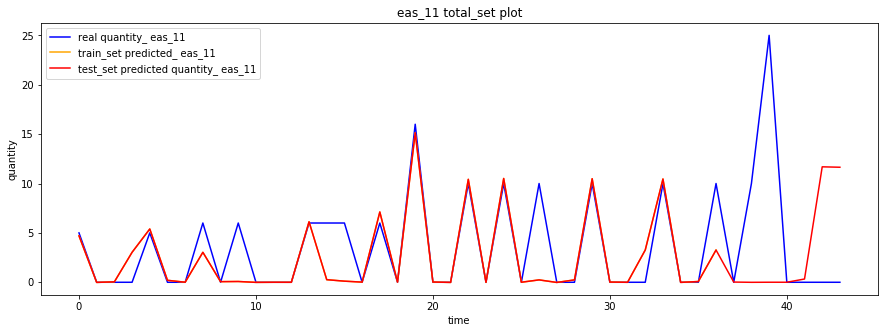

Lys_7.csv 

Epoch 1/1000
37/37 [==============================] - 4s 98ms/step - loss: 1.1431 - acc: 0.7568 - mean_absolute_error: 1.1431
Epoch 2/1000
37/37 [==============================] - 0s 740us/step - loss: 1.1418 - acc: 0.7568 - mean_absolute_error: 1.1418
Epoch 3/1000
37/37 [==============================] - 0s 703us/step - loss: 1.1396 - acc: 0.7568 - mean_absolute_error: 1.1396
Epoch 4/1000
37/37 [==============================] - 0s 673us/step - loss: 1.1425 - acc: 0.7568 - mean_absolute_error: 1.1425
Epoch 5/1000
37/37 [==============================] - 0s 647us/step - loss: 1.1394 - acc: 0.7568 - mean_absolute_error: 1.1394
Epoch 6/1000
37/37 [==============================] - 0s 647us/step - loss: 1.1407 - acc: 0.7568 - mean_absolute_error: 1.1407
Epoch 7/1000
37/37 [==============================] - 0s 620us/step - loss: 1.1416 - acc: 0.7568 - mean_absolute_error: 1.1416
Epoch 8/1000
37/37 [==============================] - 0s 674us/step - loss: 1.1403 - acc: 0.7568 - m

37/37 [==============================] - 0s 836us/step - loss: 1.1367 - acc: 0.7568 - mean_absolute_error: 1.1367
Epoch 66/1000
37/37 [==============================] - 0s 836us/step - loss: 1.1365 - acc: 0.7568 - mean_absolute_error: 1.1365
Epoch 67/1000
37/37 [==============================] - 0s 863us/step - loss: 1.1360 - acc: 0.7568 - mean_absolute_error: 1.1360
Epoch 68/1000
37/37 [==============================] - 0s 997us/step - loss: 1.1363 - acc: 0.7568 - mean_absolute_error: 1.1363
Epoch 69/1000
37/37 [==============================] - 0s 1ms/step - loss: 1.1363 - acc: 0.7568 - mean_absolute_error: 1.1363
Epoch 70/1000
37/37 [==============================] - 0s 916us/step - loss: 1.1366 - acc: 0.7568 - mean_absolute_error: 1.1366
Epoch 71/1000
37/37 [==============================] - 0s 944us/step - loss: 1.1359 - acc: 0.7568 - mean_absolute_error: 1.1359
Epoch 72/1000
37/37 [==============================] - 0s 970us/step - loss: 1.1365 - acc: 0.7568 - mean_absolute_error:

Epoch 129/1000
37/37 [==============================] - 0s 863us/step - loss: 1.1363 - acc: 0.7568 - mean_absolute_error: 1.1363
Epoch 130/1000
37/37 [==============================] - 0s 890us/step - loss: 1.1363 - acc: 0.7568 - mean_absolute_error: 1.1363
Epoch 131/1000
37/37 [==============================] - 0s 863us/step - loss: 1.1361 - acc: 0.7568 - mean_absolute_error: 1.1361
Epoch 132/1000
37/37 [==============================] - 0s 943us/step - loss: 1.1362 - acc: 0.7568 - mean_absolute_error: 1.1362
Epoch 133/1000
37/37 [==============================] - 0s 890us/step - loss: 1.1358 - acc: 0.7568 - mean_absolute_error: 1.1358
Epoch 134/1000
37/37 [==============================] - 0s 889us/step - loss: 1.1357 - acc: 0.7568 - mean_absolute_error: 1.1357
Epoch 135/1000
37/37 [==============================] - 0s 863us/step - loss: 1.1361 - acc: 0.7568 - mean_absolute_error: 1.1361
Epoch 136/1000
37/37 [==============================] - 0s 863us/step - loss: 1.1357 - acc: 0.756

37/37 [==============================] - 0s 863us/step - loss: 1.1361 - acc: 0.7568 - mean_absolute_error: 1.1361
Epoch 256/1000
37/37 [==============================] - 0s 944us/step - loss: 1.1358 - acc: 0.7568 - mean_absolute_error: 1.1358
Epoch 257/1000
37/37 [==============================] - 0s 916us/step - loss: 1.1363 - acc: 0.7568 - mean_absolute_error: 1.1363
Epoch 258/1000
37/37 [==============================] - 0s 943us/step - loss: 1.1358 - acc: 0.7568 - mean_absolute_error: 1.1358
Epoch 259/1000
37/37 [==============================] - 0s 863us/step - loss: 1.1355 - acc: 0.7568 - mean_absolute_error: 1.1355
Epoch 260/1000
37/37 [==============================] - 0s 890us/step - loss: 1.1365 - acc: 0.7568 - mean_absolute_error: 1.1365
Epoch 261/1000
37/37 [==============================] - 0s 916us/step - loss: 1.1370 - acc: 0.7568 - mean_absolute_error: 1.1370
Epoch 262/1000
37/37 [==============================] - 0s 916us/step - loss: 1.1366 - acc: 0.7568 - mean_absolu

37/37 [==============================] - 0s 836us/step - loss: 1.1355 - acc: 0.7568 - mean_absolute_error: 1.1355
Epoch 382/1000
37/37 [==============================] - 0s 862us/step - loss: 1.1353 - acc: 0.7568 - mean_absolute_error: 1.1353
Epoch 383/1000
37/37 [==============================] - 0s 836us/step - loss: 1.1356 - acc: 0.7568 - mean_absolute_error: 1.1356
Epoch 384/1000
37/37 [==============================] - 0s 916us/step - loss: 1.1355 - acc: 0.7568 - mean_absolute_error: 1.1355
Epoch 385/1000
37/37 [==============================] - 0s 863us/step - loss: 1.1356 - acc: 0.7568 - mean_absolute_error: 1.1356
Epoch 386/1000
37/37 [==============================] - 0s 916us/step - loss: 1.1356 - acc: 0.7568 - mean_absolute_error: 1.1356
Epoch 387/1000
37/37 [==============================] - 0s 889us/step - loss: 1.1355 - acc: 0.7568 - mean_absolute_error: 1.1355
Epoch 388/1000
37/37 [==============================] - 0s 863us/step - loss: 1.1355 - acc: 0.7568 - mean_absolu

37/37 [==============================] - 0s 943us/step - loss: 1.1355 - acc: 0.7568 - mean_absolute_error: 1.1355
Epoch 508/1000
37/37 [==============================] - 0s 809us/step - loss: 1.1356 - acc: 0.7568 - mean_absolute_error: 1.1356
Epoch 509/1000
37/37 [==============================] - 0s 809us/step - loss: 1.1354 - acc: 0.7568 - mean_absolute_error: 1.1354
Epoch 510/1000
37/37 [==============================] - 0s 836us/step - loss: 1.1356 - acc: 0.7568 - mean_absolute_error: 1.1356
Epoch 511/1000
37/37 [==============================] - 0s 889us/step - loss: 1.1355 - acc: 0.7568 - mean_absolute_error: 1.1355
Epoch 512/1000
37/37 [==============================] - 0s 863us/step - loss: 1.1355 - acc: 0.7568 - mean_absolute_error: 1.1355
Epoch 513/1000
37/37 [==============================] - 0s 863us/step - loss: 1.1354 - acc: 0.7568 - mean_absolute_error: 1.1354
Epoch 514/1000
37/37 [==============================] - 0s 863us/step - loss: 1.1354 - acc: 0.7568 - mean_absolu

37/37 [==============================] - 0s 916us/step - loss: 1.1353 - acc: 0.7568 - mean_absolute_error: 1.1353
Epoch 634/1000
37/37 [==============================] - 0s 890us/step - loss: 1.1355 - acc: 0.7568 - mean_absolute_error: 1.1355
Epoch 635/1000
37/37 [==============================] - 0s 836us/step - loss: 1.1354 - acc: 0.7568 - mean_absolute_error: 1.1354
Epoch 636/1000
37/37 [==============================] - 0s 943us/step - loss: 1.1355 - acc: 0.7568 - mean_absolute_error: 1.1355
Epoch 637/1000
37/37 [==============================] - 0s 943us/step - loss: 1.1353 - acc: 0.7568 - mean_absolute_error: 1.1353
Epoch 638/1000
37/37 [==============================] - 0s 916us/step - loss: 1.1354 - acc: 0.7568 - mean_absolute_error: 1.1354
Epoch 639/1000
37/37 [==============================] - 0s 970us/step - loss: 1.1354 - acc: 0.7568 - mean_absolute_error: 1.1354
Epoch 640/1000
37/37 [==============================] - 0s 997us/step - loss: 1.1354 - acc: 0.7568 - mean_absolu

37/37 [==============================] - 0s 863us/step - loss: 1.1353 - acc: 0.7568 - mean_absolute_error: 1.1353
Epoch 760/1000
37/37 [==============================] - 0s 890us/step - loss: 1.1353 - acc: 0.7568 - mean_absolute_error: 1.1353
Epoch 761/1000
37/37 [==============================] - 0s 863us/step - loss: 1.1354 - acc: 0.7568 - mean_absolute_error: 1.1354
Epoch 762/1000
37/37 [==============================] - 0s 890us/step - loss: 1.1353 - acc: 0.7568 - mean_absolute_error: 1.1353
Epoch 763/1000
37/37 [==============================] - 0s 889us/step - loss: 1.1353 - acc: 0.7568 - mean_absolute_error: 1.1353
Epoch 764/1000
37/37 [==============================] - 0s 890us/step - loss: 1.1353 - acc: 0.7568 - mean_absolute_error: 1.1353
Epoch 765/1000
37/37 [==============================] - 0s 889us/step - loss: 1.1353 - acc: 0.7568 - mean_absolute_error: 1.1353
Epoch 766/1000
37/37 [==============================] - 0s 863us/step - loss: 1.1355 - acc: 0.7568 - mean_absolu

37/37 [==============================] - 0s 836us/step - loss: 1.1353 - acc: 0.7568 - mean_absolute_error: 1.1353
Epoch 823/1000
37/37 [==============================] - 0s 863us/step - loss: 1.1353 - acc: 0.7568 - mean_absolute_error: 1.1353
Epoch 824/1000
37/37 [==============================] - 0s 916us/step - loss: 1.1352 - acc: 0.7568 - mean_absolute_error: 1.1352
Epoch 825/1000
37/37 [==============================] - 0s 890us/step - loss: 1.1353 - acc: 0.7568 - mean_absolute_error: 1.1353
Epoch 826/1000
37/37 [==============================] - 0s 890us/step - loss: 1.1353 - acc: 0.7568 - mean_absolute_error: 1.1353
Epoch 827/1000
37/37 [==============================] - 0s 863us/step - loss: 1.1352 - acc: 0.7568 - mean_absolute_error: 1.1352
Epoch 828/1000
37/37 [==============================] - 0s 863us/step - loss: 1.1353 - acc: 0.7568 - mean_absolute_error: 1.1353
Epoch 829/1000
37/37 [==============================] - 0s 916us/step - loss: 1.1353 - acc: 0.7568 - mean_absolu

37/37 [==============================] - 0s 836us/step - loss: 1.1353 - acc: 0.7568 - mean_absolute_error: 1.1353
Epoch 948/1000
37/37 [==============================] - 0s 863us/step - loss: 1.1353 - acc: 0.7568 - mean_absolute_error: 1.1353
Epoch 949/1000
37/37 [==============================] - 0s 836us/step - loss: 1.1353 - acc: 0.7568 - mean_absolute_error: 1.1353
Epoch 950/1000
37/37 [==============================] - 0s 863us/step - loss: 1.1353 - acc: 0.7568 - mean_absolute_error: 1.1353
Epoch 951/1000
37/37 [==============================] - 0s 863us/step - loss: 1.1355 - acc: 0.7568 - mean_absolute_error: 1.1355
Epoch 952/1000
37/37 [==============================] - 0s 890us/step - loss: 1.1356 - acc: 0.7568 - mean_absolute_error: 1.1356
Epoch 953/1000
37/37 [==============================] - 0s 890us/step - loss: 1.1354 - acc: 0.7568 - mean_absolute_error: 1.1354
Epoch 954/1000
37/37 [==============================] - 0s 863us/step - loss: 1.1353 - acc: 0.7568 - mean_absolu

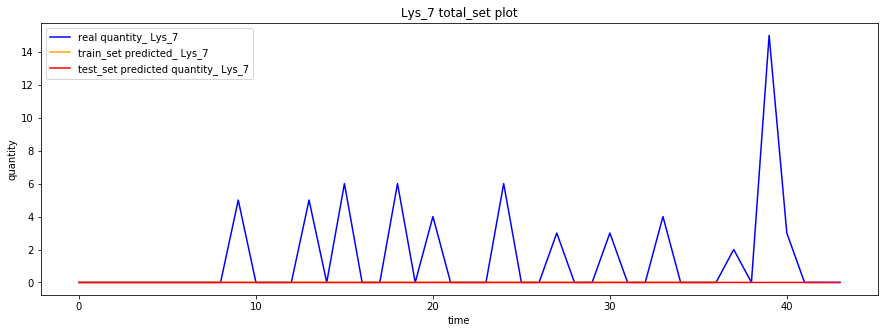

MIC_8.csv 

Epoch 1/1000
37/37 [==============================] - 4s 106ms/step - loss: 1.3343 - acc: 0.8108 - mean_absolute_error: 1.3343
Epoch 2/1000
37/37 [==============================] - 0s 749us/step - loss: 1.3324 - acc: 0.8108 - mean_absolute_error: 1.3324
Epoch 3/1000
37/37 [==============================] - 0s 674us/step - loss: 1.3319 - acc: 0.8108 - mean_absolute_error: 1.3319
Epoch 4/1000
37/37 [==============================] - 0s 653us/step - loss: 1.3286 - acc: 0.8108 - mean_absolute_error: 1.3286
Epoch 5/1000
37/37 [==============================] - 0s 611us/step - loss: 1.3291 - acc: 0.8108 - mean_absolute_error: 1.3291
Epoch 6/1000
37/37 [==============================] - 0s 620us/step - loss: 1.3316 - acc: 0.8108 - mean_absolute_error: 1.3316
Epoch 7/1000
37/37 [==============================] - 0s 647us/step - loss: 1.3302 - acc: 0.8108 - mean_absolute_error: 1.3302
Epoch 8/1000
37/37 [==============================] - 0s 620us/step - loss: 1.3299 - acc: 0.8108 - 

Epoch 65/1000
37/37 [==============================] - 0s 890us/step - loss: 1.3272 - acc: 0.8108 - mean_absolute_error: 1.3272
Epoch 66/1000
37/37 [==============================] - 0s 890us/step - loss: 1.3279 - acc: 0.8108 - mean_absolute_error: 1.3279
Epoch 67/1000
37/37 [==============================] - 0s 890us/step - loss: 1.3272 - acc: 0.8108 - mean_absolute_error: 1.3272
Epoch 68/1000
37/37 [==============================] - 0s 916us/step - loss: 1.3265 - acc: 0.8108 - mean_absolute_error: 1.3265
Epoch 69/1000
37/37 [==============================] - 0s 890us/step - loss: 1.3265 - acc: 0.8108 - mean_absolute_error: 1.3265
Epoch 70/1000
37/37 [==============================] - 0s 889us/step - loss: 1.3260 - acc: 0.8108 - mean_absolute_error: 1.3260
Epoch 71/1000
37/37 [==============================] - 0s 836us/step - loss: 1.3260 - acc: 0.8108 - mean_absolute_error: 1.3260
Epoch 72/1000
37/37 [==============================] - 0s 835us/step - loss: 1.3264 - acc: 0.8108 - mean

37/37 [==============================] - 0s 809us/step - loss: 1.3252 - acc: 0.8108 - mean_absolute_error: 1.3252
Epoch 192/1000
37/37 [==============================] - 0s 836us/step - loss: 1.3255 - acc: 0.8108 - mean_absolute_error: 1.3255
Epoch 193/1000
37/37 [==============================] - 0s 836us/step - loss: 1.3262 - acc: 0.8108 - mean_absolute_error: 1.3262
Epoch 194/1000
37/37 [==============================] - 0s 863us/step - loss: 1.3251 - acc: 0.8108 - mean_absolute_error: 1.3251
Epoch 195/1000
37/37 [==============================] - 0s 916us/step - loss: 1.3251 - acc: 0.8108 - mean_absolute_error: 1.3251
Epoch 196/1000
37/37 [==============================] - 0s 917us/step - loss: 1.3254 - acc: 0.8108 - mean_absolute_error: 1.3254
Epoch 197/1000
37/37 [==============================] - 0s 916us/step - loss: 1.3256 - acc: 0.8108 - mean_absolute_error: 1.3256
Epoch 198/1000
37/37 [==============================] - 0s 863us/step - loss: 1.3262 - acc: 0.8108 - mean_absolu

37/37 [==============================] - 0s 890us/step - loss: 1.3252 - acc: 0.8108 - mean_absolute_error: 1.3252
Epoch 317/1000
37/37 [==============================] - 0s 863us/step - loss: 1.3259 - acc: 0.8108 - mean_absolute_error: 1.3259
Epoch 318/1000
37/37 [==============================] - 0s 889us/step - loss: 1.3260 - acc: 0.8108 - mean_absolute_error: 1.3260
Epoch 319/1000
37/37 [==============================] - 0s 836us/step - loss: 1.3254 - acc: 0.8108 - mean_absolute_error: 1.3254
Epoch 320/1000
37/37 [==============================] - 0s 889us/step - loss: 1.3254 - acc: 0.8108 - mean_absolute_error: 1.3254
Epoch 321/1000
37/37 [==============================] - 0s 890us/step - loss: 1.3253 - acc: 0.8108 - mean_absolute_error: 1.3253
Epoch 322/1000
37/37 [==============================] - 0s 863us/step - loss: 1.3255 - acc: 0.8108 - mean_absolute_error: 1.3255
Epoch 323/1000
37/37 [==============================] - 0s 863us/step - loss: 1.3252 - acc: 0.8108 - mean_absolu

37/37 [==============================] - 0s 916us/step - loss: 1.3248 - acc: 0.8108 - mean_absolute_error: 1.3248
Epoch 443/1000
37/37 [==============================] - 0s 916us/step - loss: 1.3248 - acc: 0.8108 - mean_absolute_error: 1.3248
Epoch 444/1000
37/37 [==============================] - 0s 836us/step - loss: 1.3249 - acc: 0.8108 - mean_absolute_error: 1.3249
Epoch 445/1000
37/37 [==============================] - 0s 836us/step - loss: 1.3247 - acc: 0.8108 - mean_absolute_error: 1.3247
Epoch 446/1000
37/37 [==============================] - 0s 997us/step - loss: 1.3250 - acc: 0.8108 - mean_absolute_error: 1.3250
Epoch 447/1000
37/37 [==============================] - 0s 863us/step - loss: 1.3248 - acc: 0.8108 - mean_absolute_error: 1.3248
Epoch 448/1000
37/37 [==============================] - 0s 836us/step - loss: 1.3248 - acc: 0.8108 - mean_absolute_error: 1.3248
Epoch 449/1000
37/37 [==============================] - 0s 863us/step - loss: 1.3249 - acc: 0.8108 - mean_absolu

37/37 [==============================] - 0s 863us/step - loss: 1.3247 - acc: 0.8108 - mean_absolute_error: 1.3247
Epoch 569/1000
37/37 [==============================] - 0s 836us/step - loss: 1.3248 - acc: 0.8108 - mean_absolute_error: 1.3248
Epoch 570/1000
37/37 [==============================] - 0s 997us/step - loss: 1.3248 - acc: 0.8108 - mean_absolute_error: 1.3248
Epoch 571/1000
37/37 [==============================] - 0s 916us/step - loss: 1.3246 - acc: 0.8108 - mean_absolute_error: 1.3246
Epoch 572/1000
37/37 [==============================] - 0s 916us/step - loss: 1.3248 - acc: 0.8108 - mean_absolute_error: 1.3248
Epoch 573/1000
37/37 [==============================] - 0s 862us/step - loss: 1.3247 - acc: 0.8108 - mean_absolute_error: 1.3247
Epoch 574/1000
37/37 [==============================] - 0s 863us/step - loss: 1.3248 - acc: 0.8108 - mean_absolute_error: 1.3248
Epoch 575/1000
37/37 [==============================] - 0s 916us/step - loss: 1.3246 - acc: 0.8108 - mean_absolu

37/37 [==============================] - 0s 863us/step - loss: 1.3248 - acc: 0.8108 - mean_absolute_error: 1.3248
Epoch 695/1000
37/37 [==============================] - 0s 916us/step - loss: 1.3247 - acc: 0.8108 - mean_absolute_error: 1.3247
Epoch 696/1000
37/37 [==============================] - 0s 943us/step - loss: 1.3247 - acc: 0.8108 - mean_absolute_error: 1.3247
Epoch 697/1000
37/37 [==============================] - 0s 943us/step - loss: 1.3247 - acc: 0.8108 - mean_absolute_error: 1.3247
Epoch 698/1000
37/37 [==============================] - 0s 863us/step - loss: 1.3246 - acc: 0.8108 - mean_absolute_error: 1.3246
Epoch 699/1000
37/37 [==============================] - 0s 836us/step - loss: 1.3248 - acc: 0.8108 - mean_absolute_error: 1.3248
Epoch 700/1000
37/37 [==============================] - 0s 863us/step - loss: 1.3246 - acc: 0.8108 - mean_absolute_error: 1.3246
Epoch 701/1000
37/37 [==============================] - 0s 863us/step - loss: 1.3252 - acc: 0.8108 - mean_absolu

37/37 [==============================] - 0s 916us/step - loss: 1.3246 - acc: 0.8108 - mean_absolute_error: 1.3246
Epoch 821/1000
37/37 [==============================] - 0s 916us/step - loss: 1.3246 - acc: 0.8108 - mean_absolute_error: 1.3246
Epoch 822/1000
37/37 [==============================] - 0s 863us/step - loss: 1.3246 - acc: 0.8108 - mean_absolute_error: 1.3246
Epoch 823/1000
37/37 [==============================] - 0s 1ms/step - loss: 1.3248 - acc: 0.8108 - mean_absolute_error: 1.3248
Epoch 824/1000
37/37 [==============================] - 0s 997us/step - loss: 1.3247 - acc: 0.8108 - mean_absolute_error: 1.3247
Epoch 825/1000
37/37 [==============================] - 0s 970us/step - loss: 1.3247 - acc: 0.8108 - mean_absolute_error: 1.3247
Epoch 826/1000
37/37 [==============================] - 0s 943us/step - loss: 1.3250 - acc: 0.8108 - mean_absolute_error: 1.3250
Epoch 827/1000
37/37 [==============================] - 0s 970us/step - loss: 1.3245 - acc: 0.8108 - mean_absolute

37/37 [==============================] - 0s 809us/step - loss: 1.3245 - acc: 0.8108 - mean_absolute_error: 1.3245
Epoch 947/1000
37/37 [==============================] - 0s 836us/step - loss: 1.3246 - acc: 0.8108 - mean_absolute_error: 1.3246
Epoch 948/1000
37/37 [==============================] - 0s 890us/step - loss: 1.3245 - acc: 0.8108 - mean_absolute_error: 1.3245
Epoch 949/1000
37/37 [==============================] - 0s 863us/step - loss: 1.3247 - acc: 0.8108 - mean_absolute_error: 1.3247
Epoch 950/1000
37/37 [==============================] - 0s 917us/step - loss: 1.3245 - acc: 0.8108 - mean_absolute_error: 1.3245
Epoch 951/1000
37/37 [==============================] - 0s 835us/step - loss: 1.3245 - acc: 0.8108 - mean_absolute_error: 1.3245
Epoch 952/1000
37/37 [==============================] - 0s 836us/step - loss: 1.3246 - acc: 0.8108 - mean_absolute_error: 1.3246
Epoch 953/1000
37/37 [==============================] - 0s 836us/step - loss: 1.3246 - acc: 0.8108 - mean_absolu

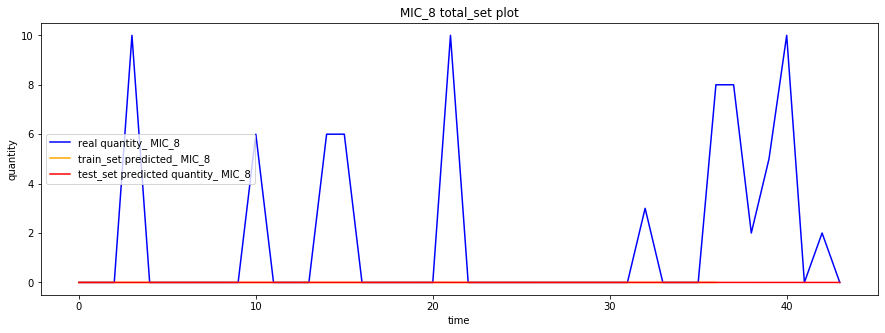

MIC_9.csv 

Epoch 1/1000
37/37 [==============================] - 4s 116ms/step - loss: 0.6869 - acc: 0.7027 - mean_absolute_error: 0.6869
Epoch 2/1000
37/37 [==============================] - 0s 701us/step - loss: 0.6813 - acc: 0.7027 - mean_absolute_error: 0.6813
Epoch 3/1000
37/37 [==============================] - 0s 679us/step - loss: 0.6829 - acc: 0.7027 - mean_absolute_error: 0.6829
Epoch 4/1000
37/37 [==============================] - 0s 701us/step - loss: 0.6804 - acc: 0.7027 - mean_absolute_error: 0.6804
Epoch 5/1000
37/37 [==============================] - 0s 808us/step - loss: 0.6799 - acc: 0.7027 - mean_absolute_error: 0.6799
Epoch 6/1000
37/37 [==============================] - 0s 647us/step - loss: 0.6803 - acc: 0.7027 - mean_absolute_error: 0.6803
Epoch 7/1000
37/37 [==============================] - 0s 728us/step - loss: 0.6789 - acc: 0.7027 - mean_absolute_error: 0.6789
Epoch 8/1000
37/37 [==============================] - 0s 620us/step - loss: 0.6810 - acc: 0.7027 - 

Epoch 65/1000
37/37 [==============================] - 0s 916us/step - loss: 0.6767 - acc: 0.7027 - mean_absolute_error: 0.6767
Epoch 66/1000
37/37 [==============================] - 0s 863us/step - loss: 0.6772 - acc: 0.7027 - mean_absolute_error: 0.6772
Epoch 67/1000
37/37 [==============================] - 0s 916us/step - loss: 0.6773 - acc: 0.7027 - mean_absolute_error: 0.6773
Epoch 68/1000
37/37 [==============================] - 0s 997us/step - loss: 0.6769 - acc: 0.7027 - mean_absolute_error: 0.6769
Epoch 69/1000
37/37 [==============================] - 0s 917us/step - loss: 0.6775 - acc: 0.7027 - mean_absolute_error: 0.6775
Epoch 70/1000
37/37 [==============================] - 0s 970us/step - loss: 0.6768 - acc: 0.7027 - mean_absolute_error: 0.6768
Epoch 71/1000
37/37 [==============================] - 0s 943us/step - loss: 0.6766 - acc: 0.7027 - mean_absolute_error: 0.6766
Epoch 72/1000
37/37 [==============================] - 0s 916us/step - loss: 0.6775 - acc: 0.7027 - mean

37/37 [==============================] - 0s 809us/step - loss: 0.6771 - acc: 0.7027 - mean_absolute_error: 0.6771
Epoch 192/1000
37/37 [==============================] - 0s 836us/step - loss: 0.6767 - acc: 0.7027 - mean_absolute_error: 0.6767
Epoch 193/1000
37/37 [==============================] - 0s 863us/step - loss: 0.6764 - acc: 0.7027 - mean_absolute_error: 0.6764
Epoch 194/1000
37/37 [==============================] - 0s 970us/step - loss: 0.6764 - acc: 0.7027 - mean_absolute_error: 0.6764
Epoch 195/1000
37/37 [==============================] - 0s 916us/step - loss: 0.6770 - acc: 0.7027 - mean_absolute_error: 0.6770
Epoch 196/1000
37/37 [==============================] - 0s 890us/step - loss: 0.6769 - acc: 0.7027 - mean_absolute_error: 0.6769
Epoch 197/1000
37/37 [==============================] - 0s 863us/step - loss: 0.6775 - acc: 0.7027 - mean_absolute_error: 0.6775
Epoch 198/1000
37/37 [==============================] - 0s 916us/step - loss: 0.6766 - acc: 0.7027 - mean_absolu

37/37 [==============================] - 0s 836us/step - loss: 0.6770 - acc: 0.7027 - mean_absolute_error: 0.6770
Epoch 318/1000
37/37 [==============================] - 0s 836us/step - loss: 0.6767 - acc: 0.7027 - mean_absolute_error: 0.6767
Epoch 319/1000
37/37 [==============================] - 0s 863us/step - loss: 0.6764 - acc: 0.7027 - mean_absolute_error: 0.6764
Epoch 320/1000
37/37 [==============================] - 0s 890us/step - loss: 0.6766 - acc: 0.7027 - mean_absolute_error: 0.6766
Epoch 321/1000
37/37 [==============================] - 0s 863us/step - loss: 0.6765 - acc: 0.7027 - mean_absolute_error: 0.6765
Epoch 322/1000
37/37 [==============================] - 0s 916us/step - loss: 0.6765 - acc: 0.7027 - mean_absolute_error: 0.6765
Epoch 323/1000
37/37 [==============================] - 0s 890us/step - loss: 0.6763 - acc: 0.7027 - mean_absolute_error: 0.6763
Epoch 324/1000
37/37 [==============================] - 0s 890us/step - loss: 0.6761 - acc: 0.7027 - mean_absolu

37/37 [==============================] - 0s 836us/step - loss: 0.6763 - acc: 0.7027 - mean_absolute_error: 0.6763
Epoch 444/1000
37/37 [==============================] - 0s 863us/step - loss: 0.6761 - acc: 0.7027 - mean_absolute_error: 0.6761
Epoch 445/1000
37/37 [==============================] - 0s 863us/step - loss: 0.6761 - acc: 0.7027 - mean_absolute_error: 0.6761
Epoch 446/1000
37/37 [==============================] - 0s 943us/step - loss: 0.6760 - acc: 0.7027 - mean_absolute_error: 0.6760
Epoch 447/1000
37/37 [==============================] - 0s 943us/step - loss: 0.6764 - acc: 0.7027 - mean_absolute_error: 0.6764
Epoch 448/1000
37/37 [==============================] - 0s 890us/step - loss: 0.6763 - acc: 0.7027 - mean_absolute_error: 0.6763
Epoch 449/1000
37/37 [==============================] - 0s 916us/step - loss: 0.6764 - acc: 0.7027 - mean_absolute_error: 0.6764
Epoch 450/1000
37/37 [==============================] - 0s 862us/step - loss: 0.6762 - acc: 0.7027 - mean_absolu

37/37 [==============================] - 0s 916us/step - loss: 0.6776 - acc: 0.7027 - mean_absolute_error: 0.6776
Epoch 570/1000
37/37 [==============================] - 0s 997us/step - loss: 0.6767 - acc: 0.7027 - mean_absolute_error: 0.6767
Epoch 571/1000
37/37 [==============================] - 0s 916us/step - loss: 0.6762 - acc: 0.7027 - mean_absolute_error: 0.6762
Epoch 572/1000
37/37 [==============================] - 0s 1ms/step - loss: 0.6774 - acc: 0.7027 - mean_absolute_error: 0.6774
Epoch 573/1000
37/37 [==============================] - 0s 997us/step - loss: 0.6773 - acc: 0.7027 - mean_absolute_error: 0.6773
Epoch 574/1000
37/37 [==============================] - 0s 944us/step - loss: 0.6774 - acc: 0.7027 - mean_absolute_error: 0.6774
Epoch 575/1000
37/37 [==============================] - 0s 890us/step - loss: 0.6771 - acc: 0.7027 - mean_absolute_error: 0.6771
Epoch 576/1000
37/37 [==============================] - 0s 916us/step - loss: 0.6762 - acc: 0.7027 - mean_absolute

37/37 [==============================] - 0s 836us/step - loss: 0.6763 - acc: 0.7027 - mean_absolute_error: 0.6763
Epoch 696/1000
37/37 [==============================] - 0s 809us/step - loss: 0.6761 - acc: 0.7027 - mean_absolute_error: 0.6761
Epoch 697/1000
37/37 [==============================] - 0s 809us/step - loss: 0.6763 - acc: 0.7027 - mean_absolute_error: 0.6763
Epoch 698/1000
37/37 [==============================] - 0s 863us/step - loss: 0.6765 - acc: 0.7027 - mean_absolute_error: 0.6765
Epoch 699/1000
37/37 [==============================] - 0s 916us/step - loss: 0.6759 - acc: 0.7027 - mean_absolute_error: 0.6759
Epoch 700/1000
37/37 [==============================] - 0s 890us/step - loss: 0.6762 - acc: 0.7027 - mean_absolute_error: 0.6762
Epoch 701/1000
37/37 [==============================] - 0s 890us/step - loss: 0.6763 - acc: 0.7027 - mean_absolute_error: 0.6763
Epoch 702/1000
37/37 [==============================] - 0s 863us/step - loss: 0.6762 - acc: 0.7027 - mean_absolu

37/37 [==============================] - 0s 809us/step - loss: 0.6760 - acc: 0.7027 - mean_absolute_error: 0.6760
Epoch 822/1000
37/37 [==============================] - 0s 809us/step - loss: 0.6761 - acc: 0.7027 - mean_absolute_error: 0.6761
Epoch 823/1000
37/37 [==============================] - 0s 943us/step - loss: 0.6760 - acc: 0.7027 - mean_absolute_error: 0.6760
Epoch 824/1000
37/37 [==============================] - 0s 916us/step - loss: 0.6761 - acc: 0.7027 - mean_absolute_error: 0.6761
Epoch 825/1000
37/37 [==============================] - 0s 916us/step - loss: 0.6761 - acc: 0.7027 - mean_absolute_error: 0.6761
Epoch 826/1000
37/37 [==============================] - 0s 863us/step - loss: 0.6758 - acc: 0.7027 - mean_absolute_error: 0.6758
Epoch 827/1000
37/37 [==============================] - 0s 836us/step - loss: 0.6758 - acc: 0.7027 - mean_absolute_error: 0.6758
Epoch 828/1000
37/37 [==============================] - 0s 836us/step - loss: 0.6761 - acc: 0.7027 - mean_absolu

37/37 [==============================] - 0s 863us/step - loss: 0.6759 - acc: 0.7027 - mean_absolute_error: 0.6759
Epoch 948/1000
37/37 [==============================] - 0s 863us/step - loss: 0.6759 - acc: 0.7027 - mean_absolute_error: 0.6759
Epoch 949/1000
37/37 [==============================] - 0s 809us/step - loss: 0.6759 - acc: 0.7027 - mean_absolute_error: 0.6759
Epoch 950/1000
37/37 [==============================] - 0s 863us/step - loss: 0.6759 - acc: 0.7027 - mean_absolute_error: 0.6759
Epoch 951/1000
37/37 [==============================] - 0s 863us/step - loss: 0.6759 - acc: 0.7027 - mean_absolute_error: 0.6759
Epoch 952/1000
37/37 [==============================] - 0s 809us/step - loss: 0.6758 - acc: 0.7027 - mean_absolute_error: 0.6758
Epoch 953/1000
37/37 [==============================] - 0s 809us/step - loss: 0.6759 - acc: 0.7027 - mean_absolute_error: 0.6759
Epoch 954/1000
37/37 [==============================] - 0s 836us/step - loss: 0.6759 - acc: 0.7027 - mean_absolu

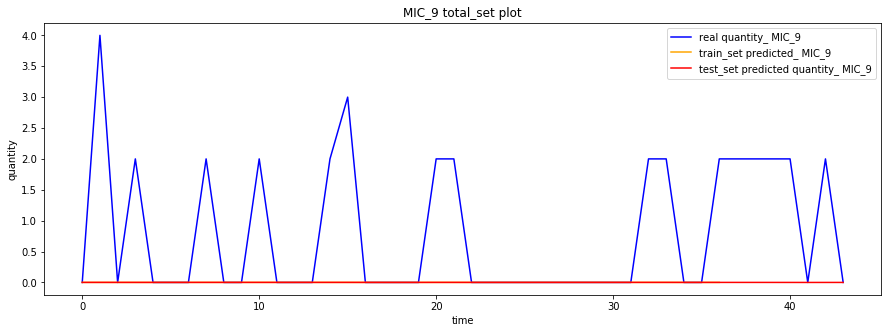

TUB_10.csv 

Epoch 1/1000
37/37 [==============================] - 5s 122ms/step - loss: 1.3048 - acc: 0.6757 - mean_absolute_error: 1.3048
Epoch 2/1000
37/37 [==============================] - 0s 863us/step - loss: 1.3028 - acc: 0.6757 - mean_absolute_error: 1.3028
Epoch 3/1000
37/37 [==============================] - 0s 727us/step - loss: 1.3036 - acc: 0.6757 - mean_absolute_error: 1.3036
Epoch 4/1000
37/37 [==============================] - 0s 728us/step - loss: 1.3026 - acc: 0.6757 - mean_absolute_error: 1.3026
Epoch 5/1000
37/37 [==============================] - 0s 674us/step - loss: 1.3034 - acc: 0.6757 - mean_absolute_error: 1.3034
Epoch 6/1000
37/37 [==============================] - 0s 674us/step - loss: 1.3006 - acc: 0.6757 - mean_absolute_error: 1.3006
Epoch 7/1000
37/37 [==============================] - 0s 674us/step - loss: 1.3053 - acc: 0.6757 - mean_absolute_error: 1.3053
Epoch 8/1000
37/37 [==============================] - 0s 647us/step - loss: 1.3025 - acc: 0.6757 -

37/37 [==============================] - 0s 836us/step - loss: 1.2984 - acc: 0.6757 - mean_absolute_error: 1.2984
Epoch 128/1000
37/37 [==============================] - 0s 943us/step - loss: 1.2986 - acc: 0.6757 - mean_absolute_error: 1.2986
Epoch 129/1000
37/37 [==============================] - 0s 836us/step - loss: 1.2982 - acc: 0.6757 - mean_absolute_error: 1.2982
Epoch 130/1000
37/37 [==============================] - 0s 916us/step - loss: 1.2991 - acc: 0.6757 - mean_absolute_error: 1.2991
Epoch 131/1000
37/37 [==============================] - 0s 889us/step - loss: 1.2983 - acc: 0.6757 - mean_absolute_error: 1.2983
Epoch 132/1000
37/37 [==============================] - 0s 890us/step - loss: 1.2988 - acc: 0.6757 - mean_absolute_error: 1.2988
Epoch 133/1000
37/37 [==============================] - 0s 890us/step - loss: 1.2990 - acc: 0.6757 - mean_absolute_error: 1.2990
Epoch 134/1000
37/37 [==============================] - 0s 916us/step - loss: 1.2989 - acc: 0.6757 - mean_absolu

37/37 [==============================] - 0s 863us/step - loss: 1.2981 - acc: 0.6757 - mean_absolute_error: 1.2981
Epoch 191/1000
37/37 [==============================] - 0s 836us/step - loss: 1.2980 - acc: 0.6757 - mean_absolute_error: 1.2980
Epoch 192/1000
37/37 [==============================] - 0s 890us/step - loss: 1.2985 - acc: 0.6757 - mean_absolute_error: 1.2985
Epoch 193/1000
37/37 [==============================] - 0s 890us/step - loss: 1.2989 - acc: 0.6757 - mean_absolute_error: 1.2989
Epoch 194/1000
37/37 [==============================] - 0s 890us/step - loss: 1.2981 - acc: 0.6757 - mean_absolute_error: 1.2981
Epoch 195/1000
37/37 [==============================] - 0s 890us/step - loss: 1.2987 - acc: 0.6757 - mean_absolute_error: 1.2987
Epoch 196/1000
37/37 [==============================] - 0s 916us/step - loss: 1.2989 - acc: 0.6757 - mean_absolute_error: 1.2989
Epoch 197/1000
37/37 [==============================] - 0s 1ms/step - loss: 1.2983 - acc: 0.6757 - mean_absolute

Epoch 254/1000
37/37 [==============================] - 0s 890us/step - loss: 1.2982 - acc: 0.6757 - mean_absolute_error: 1.2982
Epoch 255/1000
37/37 [==============================] - 0s 916us/step - loss: 1.2980 - acc: 0.6757 - mean_absolute_error: 1.2980
Epoch 256/1000
37/37 [==============================] - 0s 943us/step - loss: 1.2984 - acc: 0.6757 - mean_absolute_error: 1.2984
Epoch 257/1000
37/37 [==============================] - 0s 917us/step - loss: 1.2983 - acc: 0.6757 - mean_absolute_error: 1.2983
Epoch 258/1000
37/37 [==============================] - 0s 916us/step - loss: 1.2979 - acc: 0.6757 - mean_absolute_error: 1.2979
Epoch 259/1000
37/37 [==============================] - 0s 890us/step - loss: 1.2981 - acc: 0.6757 - mean_absolute_error: 1.2981
Epoch 260/1000
37/37 [==============================] - 0s 997us/step - loss: 1.2980 - acc: 0.6757 - mean_absolute_error: 1.2980
Epoch 261/1000
37/37 [==============================] - 0s 890us/step - loss: 1.2985 - acc: 0.675

37/37 [==============================] - 0s 863us/step - loss: 1.2982 - acc: 0.6757 - mean_absolute_error: 1.2982
Epoch 381/1000
37/37 [==============================] - 0s 943us/step - loss: 1.2978 - acc: 0.6757 - mean_absolute_error: 1.2978
Epoch 382/1000
37/37 [==============================] - 0s 889us/step - loss: 1.2980 - acc: 0.6757 - mean_absolute_error: 1.2980
Epoch 383/1000
37/37 [==============================] - 0s 943us/step - loss: 1.2978 - acc: 0.6757 - mean_absolute_error: 1.2978
Epoch 384/1000
37/37 [==============================] - 0s 916us/step - loss: 1.2982 - acc: 0.6757 - mean_absolute_error: 1.2982
Epoch 385/1000
37/37 [==============================] - 0s 890us/step - loss: 1.2980 - acc: 0.6757 - mean_absolute_error: 1.2980
Epoch 386/1000
37/37 [==============================] - 0s 836us/step - loss: 1.2982 - acc: 0.6757 - mean_absolute_error: 1.2982
Epoch 387/1000
37/37 [==============================] - 0s 836us/step - loss: 1.2978 - acc: 0.6757 - mean_absolu

37/37 [==============================] - 0s 863us/step - loss: 1.2980 - acc: 0.6757 - mean_absolute_error: 1.2980
Epoch 507/1000
37/37 [==============================] - 0s 863us/step - loss: 1.2978 - acc: 0.6757 - mean_absolute_error: 1.2978
Epoch 508/1000
37/37 [==============================] - 0s 863us/step - loss: 1.2976 - acc: 0.6757 - mean_absolute_error: 1.2976
Epoch 509/1000
37/37 [==============================] - 0s 890us/step - loss: 1.2976 - acc: 0.6757 - mean_absolute_error: 1.2976
Epoch 510/1000
37/37 [==============================] - 0s 890us/step - loss: 1.2979 - acc: 0.6757 - mean_absolute_error: 1.2979
Epoch 511/1000
37/37 [==============================] - 0s 890us/step - loss: 1.2979 - acc: 0.6757 - mean_absolute_error: 1.2979
Epoch 512/1000
37/37 [==============================] - 0s 917us/step - loss: 1.2977 - acc: 0.6757 - mean_absolute_error: 1.2977
Epoch 513/1000
37/37 [==============================] - 0s 916us/step - loss: 1.2982 - acc: 0.6757 - mean_absolu

37/37 [==============================] - 0s 863us/step - loss: 1.2975 - acc: 0.6757 - mean_absolute_error: 1.2975
Epoch 633/1000
37/37 [==============================] - 0s 863us/step - loss: 1.2977 - acc: 0.6757 - mean_absolute_error: 1.2977
Epoch 634/1000
37/37 [==============================] - 0s 863us/step - loss: 1.2977 - acc: 0.6757 - mean_absolute_error: 1.2977
Epoch 635/1000
37/37 [==============================] - 0s 863us/step - loss: 1.2977 - acc: 0.6757 - mean_absolute_error: 1.2977
Epoch 636/1000
37/37 [==============================] - 0s 917us/step - loss: 1.2975 - acc: 0.6757 - mean_absolute_error: 1.2975
Epoch 637/1000
37/37 [==============================] - 0s 863us/step - loss: 1.2974 - acc: 0.6757 - mean_absolute_error: 1.2974
Epoch 638/1000
37/37 [==============================] - 0s 997us/step - loss: 1.2976 - acc: 0.6757 - mean_absolute_error: 1.2976
Epoch 639/1000
37/37 [==============================] - 0s 944us/step - loss: 1.2978 - acc: 0.6757 - mean_absolu

37/37 [==============================] - 0s 836us/step - loss: 1.2977 - acc: 0.6757 - mean_absolute_error: 1.2977
Epoch 759/1000
37/37 [==============================] - 0s 836us/step - loss: 1.2978 - acc: 0.6757 - mean_absolute_error: 1.2978
Epoch 760/1000
37/37 [==============================] - 0s 863us/step - loss: 1.2979 - acc: 0.6757 - mean_absolute_error: 1.2979
Epoch 761/1000
37/37 [==============================] - 0s 863us/step - loss: 1.2977 - acc: 0.6757 - mean_absolute_error: 1.2977
Epoch 762/1000
37/37 [==============================] - 0s 916us/step - loss: 1.2978 - acc: 0.6757 - mean_absolute_error: 1.2978
Epoch 763/1000
37/37 [==============================] - 0s 890us/step - loss: 1.2976 - acc: 0.6757 - mean_absolute_error: 1.2976
Epoch 764/1000
37/37 [==============================] - 0s 916us/step - loss: 1.2977 - acc: 0.6757 - mean_absolute_error: 1.2977
Epoch 765/1000
37/37 [==============================] - 0s 916us/step - loss: 1.2975 - acc: 0.6757 - mean_absolu

37/37 [==============================] - 0s 890us/step - loss: 1.2978 - acc: 0.6757 - mean_absolute_error: 1.2978
Epoch 885/1000
37/37 [==============================] - 0s 836us/step - loss: 1.2977 - acc: 0.6757 - mean_absolute_error: 1.2977
Epoch 886/1000
37/37 [==============================] - 0s 836us/step - loss: 1.2975 - acc: 0.6757 - mean_absolute_error: 1.2975
Epoch 887/1000
37/37 [==============================] - 0s 890us/step - loss: 1.2975 - acc: 0.6757 - mean_absolute_error: 1.2975
Epoch 888/1000
37/37 [==============================] - 0s 943us/step - loss: 1.2976 - acc: 0.6757 - mean_absolute_error: 1.2976
Epoch 889/1000
37/37 [==============================] - 0s 889us/step - loss: 1.2974 - acc: 0.6757 - mean_absolute_error: 1.2974
Epoch 890/1000
37/37 [==============================] - 0s 890us/step - loss: 1.2975 - acc: 0.6757 - mean_absolute_error: 1.2975
Epoch 891/1000
37/37 [==============================] - 0s 916us/step - loss: 1.2977 - acc: 0.6757 - mean_absolu

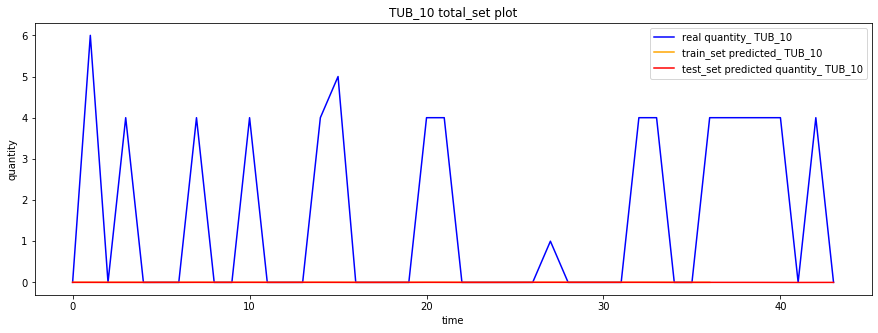

In [28]:
# files_csv = ['Buf_2.csv', 'Buf_3.csv', 'Buf_4.csv']
mae_list = []

for x in files_csv:
    print(x, '\n')
    
    df = pd.read_csv(x)
    df['date'] =  pd.to_datetime(df['date'])
    df.drop(['description'], axis=1, inplace = True)
    
    # Train/test split 
    total_set = df.iloc[::].values
    test_set = df.iloc[42:,1].values
    training_set = df.iloc[:42].values
    
    # Creating a data structure with rolling_window timesteps and 1 output
    X_train = []
    y_train = []
    for i in range(rolling_window, 42):
        X_train.append(training_set[i-rolling_window:i, 1])
        y_train.append(training_set[i, 1])
    X_train, y_train = np.array(X_train), np.array(y_train)

    # Reshaping
    X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
    
    # Initialising the RNN
    regressor = Sequential()

    # Adding the first LSTM layer and some Dropout regularisation
    regressor.add(LSTM(units = my_units, return_sequences = True, input_shape = (X_train.shape[1], 1)))
    regressor.add(Dropout(my_dropout))

    # Adding a second LSTM layer and some Dropout regularisation
    regressor.add(LSTM(units = my_units, return_sequences = True))
    regressor.add(Dropout(my_dropout))

    # Adding a third LSTM layer and some Dropout regularisation
    regressor.add(LSTM(units = my_units))
    regressor.add(Dropout(my_dropout))

    # Adding the output layer
    regressor.add(Dense(units = 1))

    # Compiling the RNN
    regressor.compile(optimizer = 'adam', loss = 'mean_absolute_error', metrics=['accuracy', 'mae'])

    # Fitting the RNN to the Training set
    regressor.fit(X_train, y_train, epochs = my_epochs, batch_size = my_batch_size)
    
    # Make prediction on test set
    y_train_predict = regressor.predict(X_train)
    
    # Getting the predicted quantity for x
    X_test = []
    for j in range(42, 49):
        X_test.append(total_set[j-5:j, 1])
    X_test = np.array(X_test)
    X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
    
    # prediction
    y_predicted = regressor.predict(X_test) 
    
    # Make prediction on total set - used for plotting
    X_total = []
    y_total = []
    for k in range(rolling_window, 49):
        X_total.append(total_set[k-5:k, 1])
        y_total.append(total_set[k, 1])
    X_total, y_total = np.array(X_total), np.array(y_total)
    y_test = y_total[-7:]
    X_total = np.reshape(X_total, (X_total.shape[0], X_total.shape[1], 1))
    y_predicted_total = regressor.predict(X_total)     

    # Visualising the results for training set
    plt.figure(figsize=(15,5))
    plt.plot(y_total, color = 'blue', label = 'real quantity_ ' + x[:-4])    
    plt.plot(y_train_predict, color = 'orange', label = 'train_set predicted_ '+ x[:-4])
    plt.plot(y_predicted_total, color = 'red', label = 'test_set predicted quantity_ ' + x[:-4])
    
    plt.title(x[:-4] +' total_set plot')
    plt.xlabel('time')
    plt.ylabel('quantity')
    plt.legend()
    plt.show()

    # mean_absolute_error for training set
    from sklearn.metrics import mean_absolute_error
    mae_list.append(mean_absolute_error(y_test, y_predicted) )

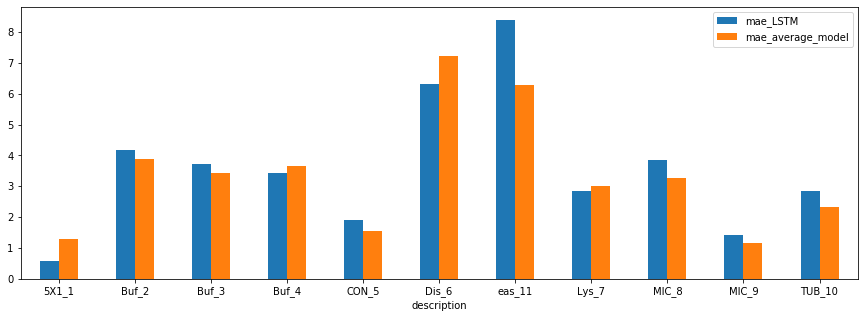

In [30]:
df_mae = pd.DataFrame({'description':name, 'mae_LSTM':mae_list, 'mae_average_model':benchmark_2})
ax = df_mae.plot.bar(x='description', y=['mae_LSTM','mae_average_model'], rot=0, figsize=(15,5))

In [17]:
len(y_predicted)

7

In [18]:
len(y_test)

7

In [22]:
print(name)

['5X1_1', 'Buf_2', 'Buf_3', 'Buf_4', 'CON_5', 'Dis_6', 'eas_11', 'Lys_7', 'MIC_8', 'MIC_9', 'TUB_10']


In [23]:
print(files_csv)

['5X1_1.csv', 'Buf_2.csv', 'Buf_3.csv', 'Buf_4.csv', 'CON_5.csv', 'Dis_6.csv', 'eas_11.csv', 'Lys_7.csv', 'MIC_8.csv', 'MIC_9.csv', 'TUB_10.csv']


In [31]:
df_mae

,description,mae_LSTM,mae_average_model
0,5X1_1,0.572630,1.285714
1,Buf_2,4.167119,3.874150
2,Buf_3,3.715920,3.431973
3,Buf_4,3.428961,3.646259
4,CON_5,1.900310,1.557823
5,Dis_6,6.316662,7.221088
6,eas_11,8.384199,6.285714
7,Lys_7,2.857547,3.017007
8,MIC_8,3.857143,3.255102
9,MIC_9,1.428481,1.153061


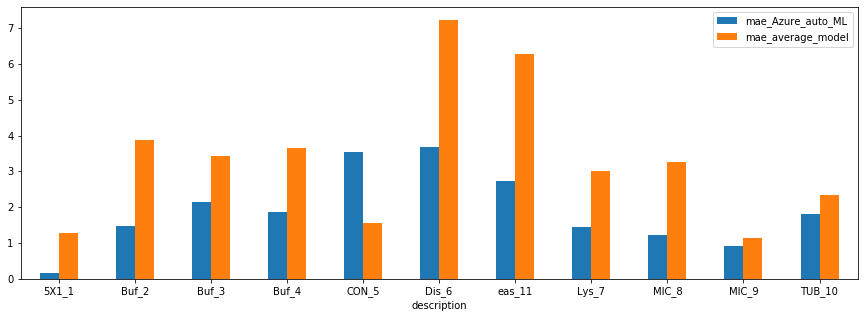

In [32]:
# autoML_models = ['testrun2-1-5X1', 'testrun2-10-TUB', 'testrun2-11-eas', 'testrun2-2-Buf', 'testrun2-3-Buf', 'testrun2-4-Buf', 'testrun2-5-CON', 'testrun2-6-Dis', 'testrun2-7-Lys', 'testrun2-8-MIC', 'testrun2-9-MIC']
# autoML_mae = [0.16, 1.8104289309552466, 2.7367659411949754, 1.4885610462300982, 2.1571597326085685, 1.8800000000000001, 3.545629901156217, 3.6799999999999997, 1.441901131901132, 1.2367515896463264, 0.9052144654776233]
# ['5X1_1', 'Buf_2', 'Buf_3', 'Buf_4', 'CON_5', 'Dis_6', 'eas_11', 'Lys_7', 'MIC_8', 'MIC_9', 'TUB_10']
autoML_mae = [0.16, 1.4885610462300982, 2.1571597326085685, 1.8800000000000001, 3.545629901156217, 3.6799999999999997, 2.7367659411949754, 1.441901131901132, 1.2367515896463264, 0.9052144654776233, 1.8104289309552466]
df_autoML_mae = pd.DataFrame({'description':name, 'mae_Azure_auto_ML':autoML_mae, 'mae_average_model':benchmark_2})
ax = df_autoML_mae.plot.bar(x='description', y=['mae_Azure_auto_ML','mae_average_model'], rot=0, figsize=(15,5))



In [33]:
df_autoML_mae

,description,mae_Azure_auto_ML,mae_average_model
0,5X1_1,0.160000,1.285714
1,Buf_2,1.488561,3.874150
2,Buf_3,2.157160,3.431973
3,Buf_4,1.880000,3.646259
4,CON_5,3.545630,1.557823
5,Dis_6,3.680000,7.221088
6,eas_11,2.736766,6.285714
7,Lys_7,1.441901,3.017007
8,MIC_8,1.236752,3.255102
9,MIC_9,0.905214,1.153061
